
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Communication Systems  <br>
<font color=2565AE size=5>
Electrical Engineering Department <br>

<font color=3C99D size=5>
Project - Fall 2025<br>

<font color=696880 size=4>
Amitis Mirabedini - 402102562

### 2.1 Information Source

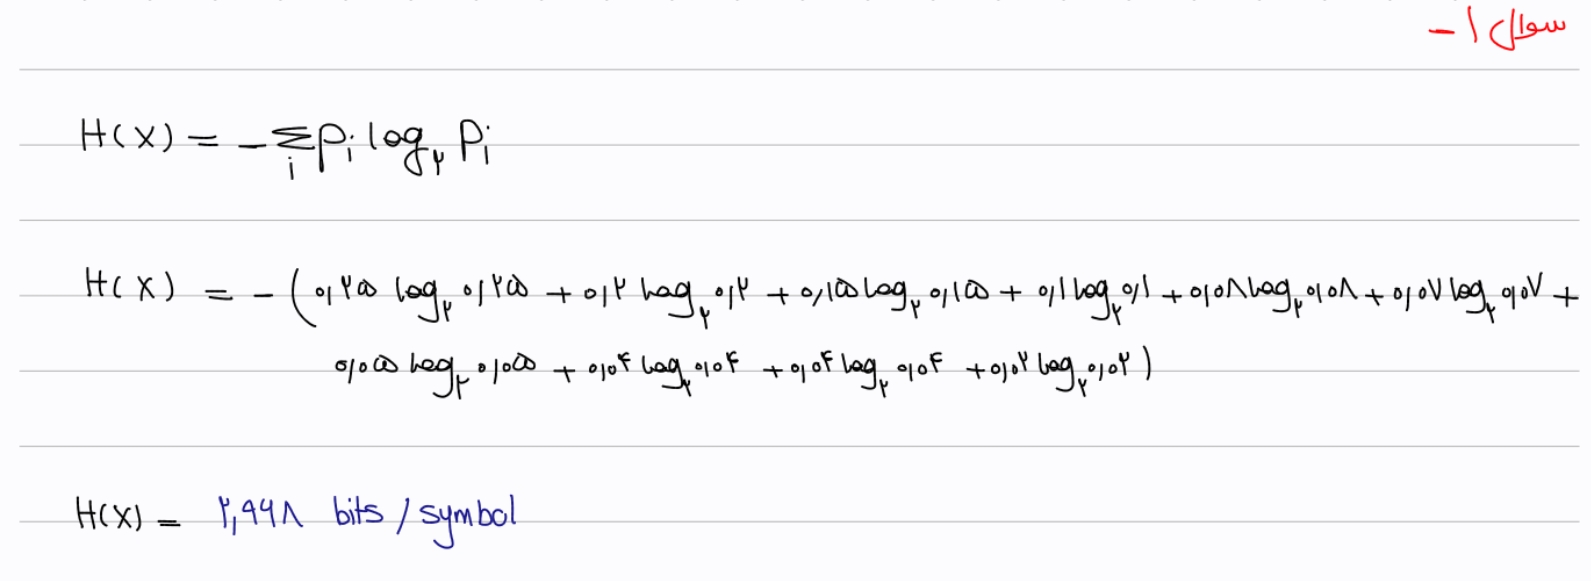

In [139]:
import numpy as np
def enthropy_rate(probab):
    probab = np.array(probab)
    probab = probab[probab>0]
    enthropy = -np.sum(probab*np.log2(probab))
    return enthropy

symbols = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
p = [0.25, 0.20, 0.15, 0.10, 0.08, 0.07, 0.05, 0.04, 0.04, 0.02]
H = enthropy_rate(p)
print(H) 

2.9676688752351565


Compared to the theoretical value if 2.968, they match perfectly.

### 2.2 Source Coding
Q1

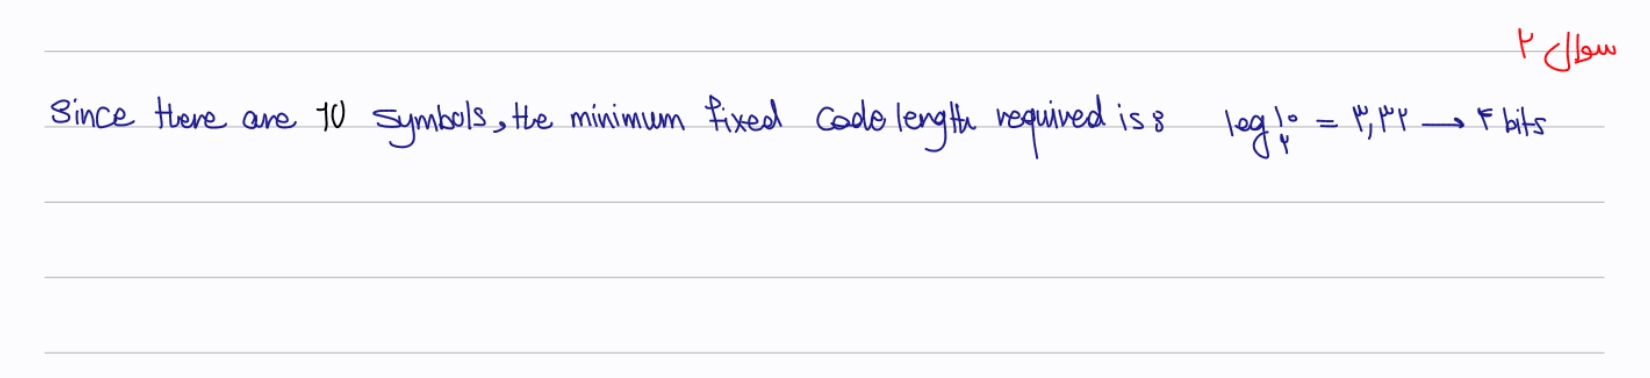

In [140]:
def naive_code(symbols, bitspersym = 4):

    codebook = {}
    for i, symbol in enumerate(symbols):
        codebook[symbol] = format(i, f'0{bitspersym}b')
    
    return codebook

def avg_code_length(codebook, probabs):
    lengths = [len(code) for code in codebook.values()]
    avg_length = sum(p * l for p, l in zip(probabs, lengths))
    return avg_length


codebook = naive_code(symbols)
for s, c in codebook.items():
    print(s, "->", c)

L_avg_naive = avg_code_length(codebook, p)
print("Average code length=", L_avg_naive)
        

A -> 0000
B -> 0001
C -> 0010
D -> 0011
E -> 0100
F -> 0101
G -> 0110
H -> 0111
I -> 1000
J -> 1001
Average code length= 4.0


Q2

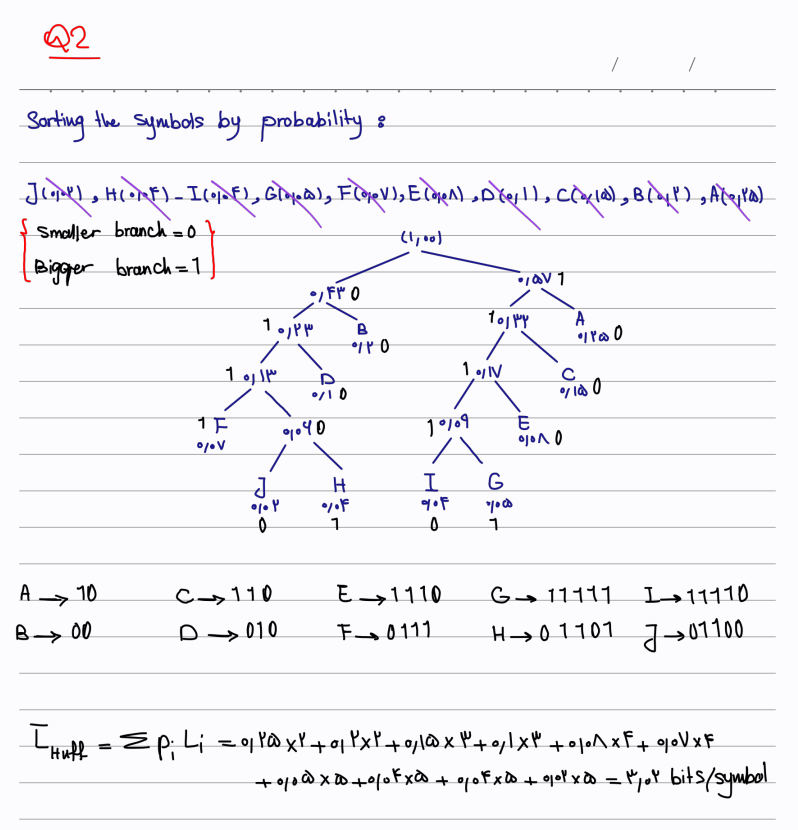

Q3

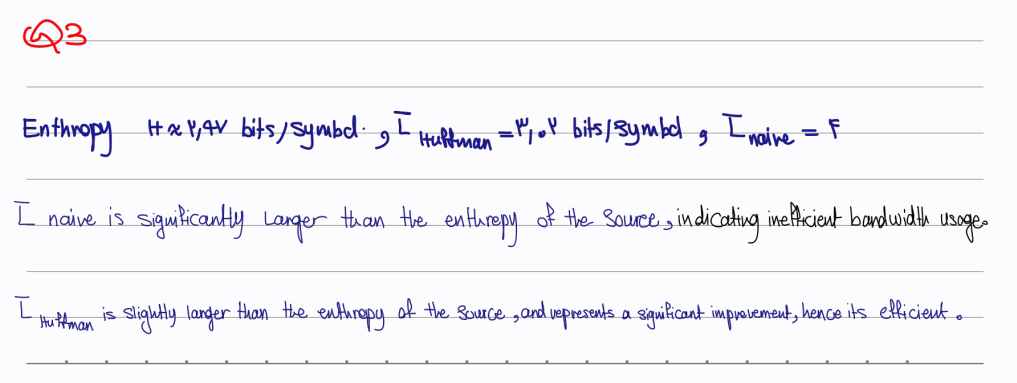

Q4

In [141]:
import heapq
from collections import defaultdict
import random

class Node:
    """Node class for Huffman tree construction"""
    def __init__(self, char, prob):
        self.char = char  # Character (for leaf nodes)
        self.prob = prob  # Probability
        self.left = None  # Left child
        self.right = None  # Right child
    
    def __lt__(self, other):
        # For comparing nodes in heap
        return self.prob < other.prob

def Huffman_code(alphabets, probabilities):
   
    # Validate inputs
    if len(alphabets) != len(probabilities):
        raise ValueError("Length of alphabets and probabilities must be equal")
    
    if abs(sum(probabilities) - 1.0) > 1e-10:
        raise ValueError("Sum of probabilities must equal 1")
    
    # Create leaf nodes
    nodes = []
    for char, prob in zip(alphabets, probabilities):
        nodes.append(Node(char, prob))
    
    # Convert list to min-heap
    heapq.heapify(nodes)
    
    # Build Huffman tree
    while len(nodes) > 1:
        # Remove two nodes with lowest probabilities
        left = heapq.heappop(nodes)
        right = heapq.heappop(nodes)
        
        # Create new parent node
        merged = Node(None, left.prob + right.prob)
        merged.left = left
        merged.right = right
        
        # Add new node back to heap
        heapq.heappush(nodes, merged)
    
    # Root of Huffman tree
    root = nodes[0] if nodes else None
    
    # Generate codes by traversing the tree
    codes_dict = {}
    
    def traverse(node, current_code):
        if node is None:
            return
        
        # If we reach a leaf node
        if node.char is not None:
            codes_dict[node.char] = current_code
            return
        
        # Traverse left child (add 0)
        traverse(node.left, current_code + "0")
        # Traverse right child (add 1)
        traverse(node.right, current_code + "1")
    
    traverse(root, "")
    
    # Create an array of codes in the same order as input alphabets
    codes_array = [codes_dict[char] for char in alphabets]
    
    return codes_array, root

def source_coder(text, huffman_codes_array, alphabets):
    
    # Create a dictionary from alphabets and codes array
    huffman_dict = {alphabets[i]: huffman_codes_array[i] for i in range(len(alphabets))}
    
    encoded_bits = ""
    
    for char in text:
        if char not in huffman_dict:
            raise ValueError(f"Character '{char}' not in code table")
        encoded_bits += huffman_dict[char]
    
    return encoded_bits

def source_decoder(encoded_bits, huffman_tree_root):
    
    decoded_text = ""
    current_node = huffman_tree_root
    
    for bit in encoded_bits:
        if bit == '0':
            current_node = current_node.left
        elif bit == '1':
            current_node = current_node.right
        else:
            raise ValueError(f"Invalid bit '{bit}' - only 0 and 1 allowed")
        
        # If we reach a leaf node
        if current_node.char is not None:
            decoded_text += current_node.char
            current_node = huffman_tree_root  # Return to root
    
    if current_node != huffman_tree_root:
        print("⚠️  Warning: Bit string might be incomplete")
    
    return decoded_text

def main():
    symbols = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
    p = [0.25, 0.20, 0.15, 0.10, 0.08, 0.07, 0.05, 0.04, 0.04, 0.02]
    
    print("=" * 70)
    print("HUFFMAN CODING SYSTEM")
    print("=" * 70)
    print(f"Symbols: {symbols}")
    print(f"Probabilities: {p}")
    print(f"Sum of probabilities: {sum(p):.4f}")
    
    huffman_codes_array, huffman_tree = Huffman_code(symbols, p)
    
    print("\nGenerated Huffman Codes (as array):")
    print(huffman_codes_array)
    
    print("\nDetailed View:")
    print(f"{'Symbol':<8} {'Probability':<12} {'Huffman Code':<15} {'Code Length':<12}")
    print("-" * 50)
    for i, symbol in enumerate(symbols):
        code = huffman_codes_array[i]
        print(f"{symbol:<8} {p[i]:<12.4f} {code:<15} {len(code):<12}")
    
    avg_length = sum(len(huffman_codes_array[i]) * p[i] for i in range(len(symbols)))
    
    
    
    # Test cases
    print("\n" + "=" * 70)
    print("TEST CASES")
    print("=" * 70)
    
    # Test 1: Encode "ABCDEFGHIJ"
    test_text1 = "ABCDEFGHIJ"
    print(f"\nTest 1 - Encoding '{test_text1}':")
    encoded1 = source_coder(test_text1, huffman_codes_array, symbols)
    print(f"  Encoded: {encoded1}")
    print(f"  Length: {len(encoded1)} bits")
    print(f"  ASCII would be: {len(test_text1) * 8} bits")
    
    decoded1 = source_decoder(encoded1, huffman_tree)
    print(f"  Decoded: {decoded1}")
    print(f"  ✅ Correct: {test_text1 == decoded1}")
    
    
    

if __name__ == "__main__":
    # Run the full demo
    main()
    
    

HUFFMAN CODING SYSTEM
Symbols: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
Probabilities: [0.25, 0.2, 0.15, 0.1, 0.08, 0.07, 0.05, 0.04, 0.04, 0.02]
Sum of probabilities: 1.0000

Generated Huffman Codes (as array):
['10', '00', '110', '010', '1110', '0111', '11111', '11110', '01101', '01100']

Detailed View:
Symbol   Probability  Huffman Code    Code Length 
--------------------------------------------------
A        0.2500       10              2           
B        0.2000       00              2           
C        0.1500       110             3           
D        0.1000       010             3           
E        0.0800       1110            4           
F        0.0700       0111            4           
G        0.0500       11111           5           
H        0.0400       11110           5           
I        0.0400       01101           5           
J        0.0200       01100           5           

TEST CASES

Test 1 - Encoding 'ABCDEFGHIJ':
  Encoded: 100011001011100

Q5

In [142]:
def generate_data(length):
    symbols = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
    probabilities = [0.25, 0.20, 0.15, 0.10, 0.08, 0.07, 0.05, 0.04, 0.04, 0.02]
    return ''.join(random.choices(symbols, weights=probabilities, k=length))


test_data = generate_data(20)
print(f"generated string: {test_data}")

generated string: FACACBABCIADBEBFCAAF


Q6

In [143]:
codes, tree = Huffman_code(symbols, p)
encoded = source_coder(test_data, codes, symbols)
decoded = source_decoder(encoded, tree)
print("Input string (from generated_data):")
print(test_data)
print("\nEncoded data:")
print(encoded)
print("\nOutput string (from decoder):")
print(decoded)



Input string (from generated_data):
FACACBABCIADBEBFCAAF

Encoded data:
01111011010110001000110011011001000111000011111010100111

Output string (from decoder):
FACACBABCIADBEBFCAAF


### 2.3 Channel Coding

Q1

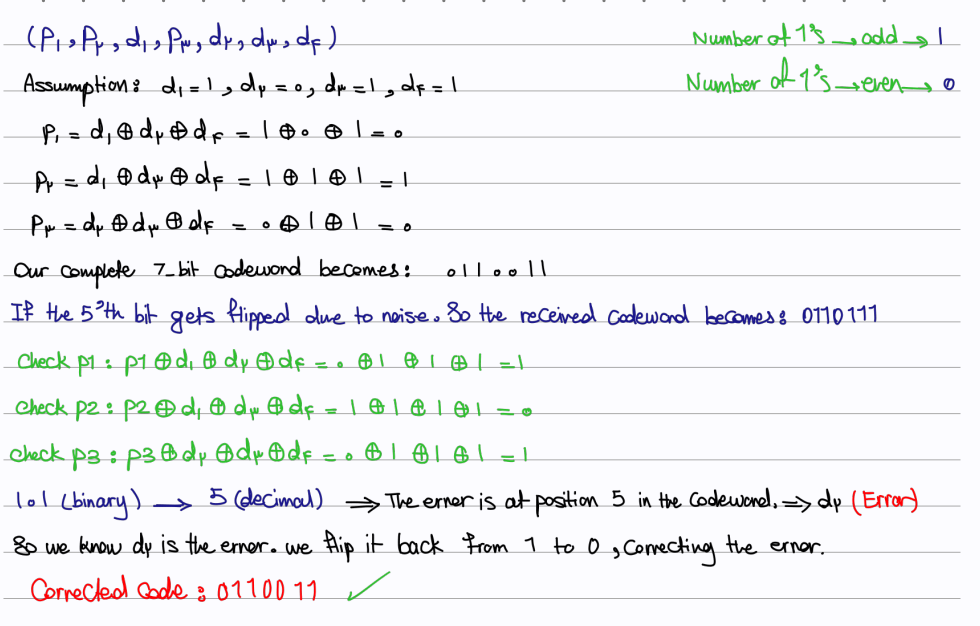

Q2

In [144]:
def Hamming_coder(bit_string):
    if len(bit_string) % 4 != 0:
        raise ValueError("bit string length must be a multiple of 4")
    encoded_string = ""
    for i in range(0, len(bit_string), 4):
        block = bit_string[i:i+4]

        d1 = int(block[0])
        d2 = int(block[1])
        d3 = int(block[2])
        d4 = int(block[3])

        p1 = d1 ^ d2 ^ d4
        p2 = d1 ^ d3 ^ d4
        p3 = d2 ^ d3 ^ d4

        codeword = f"{p1}{p2}{d1}{p3}{d2}{d3}{d4}"
        encoded_string += codeword

    return encoded_string



Q3

In [145]:
hamming_encoded = Hamming_coder(encoded if len(encoded) % 4 == 0 else encoded + "0" * (4 - len(encoded) % 4))

print("Channel Coding - Hamming (7,4)")
print("="*50)
print(f"Input (Huffman bits):  {encoded}")
print(f"Output (Hamming code): {hamming_encoded}")

Channel Coding - Hamming (7,4)
Input (Huffman bits):  01111011010110001000110011011001000111000011111010100111
Output (Hamming code): 00011110110011010010111100001110000011110010101010011001110100101111001000011001011010110100001111


### 2.4 Channel

In [146]:
def channel(length_km, input_signal):
    att_dB = 1 * length_km
    alpha = 10 ** (-att_dB/20.0)
    output_signal = alpha * np.array(input_signal)
    return output_signal, alpha

def channel_impluse_respone(length_km, fs = 1.0):
    att_dB = 1.0 * length_km
    alpha = 10 ** (-att_dB/20.0)
    h = np.zeros(int(fs*0.1)) #100ms duration
    h[0] = alpha
    t = np.arange(len(h)) / fs
    return h, t, alpha
def channel_transfer_function(length_km, frequencies):
   
    att_dB = 1.0 * length_km
    alpha = 10 ** (-att_dB / 20.0)
    
    # For ideal channel: flat frequency response with constant attenuation
    # and linear phase (zero phase for ideal)
    H = alpha * np.ones_like(frequencies, dtype=complex)
    
    return H



### 2.5 Noise

In [147]:
def awgn_channel(input_signal, length_km, sigma):
    att_dB = 1.0 * length_km
    alpha = 10 ** (-att_dB / 20.0)

    input_signal = np.array(input_signal)
    attenuated_signal = alpha * input_signal

    N = len(attenuated_signal)

    noise = (sigma/np.sqrt(2)) * (np.random.randn(N) + 1j*np.random.randn(N))

    received_signal = attenuated_signal + noise

    return received_signal


Above is the final channel with noise added.

### 2.6 Matched Filter

In [148]:
def matched_filter_with_pulse(received_signal, pulse_length=1):
    """
    Matched filter for rectangular pulse of given length
    
    Parameters:
    received_signal (array): Received signal
    pulse_length (int): Length of rectangular pulse in samples
    
    Returns:
    array: Matched filter output
    """
    # Create rectangular pulse
    pulse = np.ones(pulse_length)
    
    # Matched filter is time-reversed pulse
    matched_response = pulse[::-1]
    
    # Convolve with received signal
    filtered = np.convolve(received_signal, matched_response, mode='full')
    
    return filtered

def sample_at_symbol_times(filtered_signal, pulse_length=1):
    """
    Sample at optimal times (end of symbol period)
    
    Parameters:
    filtered_signal (array): Matched filter output
    pulse_length (int): Length of pulse in samples
    
    Returns:
    array: Sampled values
    """
    # Sample at the end of each symbol period
    # For rectangular pulse of length L, peak occurs at L-1
    sample_indices = range(pulse_length - 1, len(filtered_signal), pulse_length)
    
    return filtered_signal[sample_indices]

### 2.7 Modulation

Q1

In [149]:
def PulseShaping(bits, pulse_shape):
    bits = np.array(bits)
    output_signal = []
    for bit in bits:
        if bit == 1:
            output_signal.extend(pulse_shape)
        else:
            output_signal.extend(-pulse_shape)
    
    return np.array(output_signal)

Q2

In [150]:
def AnalogMod(waveform, fc, fs = 1000000.0):
    n = len(waveform)
    t = np.arange(n)/fs
    carrier = np.cos(2*np.pi*fc*t)
    modulated_signal = waveform * carrier
    return modulated_signal

Q3

In [151]:
from scipy import signal
def AnalogDemod(xc, fs, fc, bw):
    n = len(xc)
    t = np.arange(n)/fs
    cos_lo = np.cos(2 *np.pi * fc * t)
    sin_lo = np.sin(2*np.pi*fc*t)
    i_mixed = xc * cos_lo
    q_mixed = xc *sin_lo

    nyquist = fs / 2
    cutoff_nomalized = bw / nyquist

    filter_order = 100
    b = signal.firwin(filter_order, cutoff_nomalized, window ='hamming')
    yi = signal.lfilter(b, 1.0, i_mixed)
    yq = signal.lfilter(b, 1.0, q_mixed)

    return yi, yq

The codes above for PUlseShaping, AnalogMod, and AnalogDemod are about to be revised for each of the following parts.

#### Orthogonal Frequencies:

In [152]:
# 4 orthogonal tones for 4-FSK using table specs

fs = 1_000_000     # Hz
Ts = 10e-3         # s
fc = 10_000        # Hz
B  = 1_000         # Hz

delta_f = 1 / Ts   # 100 Hz (minimum orthogonal spacing)

tone_offsets = np.array([-1.5, -0.5, 0.5, 1.5]) * delta_f  # [-150, -50, +50, +150]
tones = fc + tone_offsets

print("Δf =", delta_f, "Hz")
print("Chosen tones (Hz):", tones)
print("Within channel band? ", np.all((tones >= fc - B/2) & (tones <= fc + B/2)))


Δf = 100.0 Hz
Chosen tones (Hz): [ 9850.  9950. 10050. 10150.]
Within channel band?  True


#### FSK-a

In [153]:
# ================================
# Part 2.7 (a)
# Generate source → Huffman → Hamming
# ================================

L = 150  # long sequence (can increase later)

# --- generate alphabet sequence ---
data = generate_data(L)

# --- source coding (Huffman) ---
encoded_bits = source_coder(data, codes, symbols)

# --- pad to multiple of 4 for Hamming ---
if len(encoded_bits) % 4 != 0:
    encoded_bits += "0" * (4 - len(encoded_bits) % 4)

# --- Hamming coding ---
hamming_bits = Hamming_coder(encoded_bits)

# --- make dibits for 4-FSK ---
if len(hamming_bits) % 2 != 0:
    hamming_bits += "0"

dibits = np.array([hamming_bits[i:i+2] for i in range(0, len(hamming_bits), 2)])

print("Generated symbols (first 50):", data[:50])
print("Total Huffman bits:", len(encoded_bits))
print("Total Hamming bits:", len(hamming_bits))
print("First 20 dibits:", dibits[:20])


Generated symbols (first 50): EHABBBFEFBCDGAEDCADGAGACBAACBBHBFHCICDIEIABBDBCAHB
Total Huffman bits: 468
Total Hamming bits: 820
First 20 dibits: ['00' '10' '11' '01' '11' '11' '11' '10' '01' '10' '00' '00' '00' '00'
 '10' '00' '01' '11' '11' '11']


#### FSK-b

 -Revised functions for 4-FSk

sigma2= 15  SNR(dB)= -28.75  BER=0.0220
sigma2= 30  SNR(dB)= -31.76  BER=0.0890
sigma2= 45  SNR(dB)= -33.52  BER=0.1610
sigma2= 60  SNR(dB)= -34.77  BER=0.2305
sigma2= 75  SNR(dB)= -35.74  BER=0.2488
sigma2= 90  SNR(dB)= -36.53  BER=0.2622


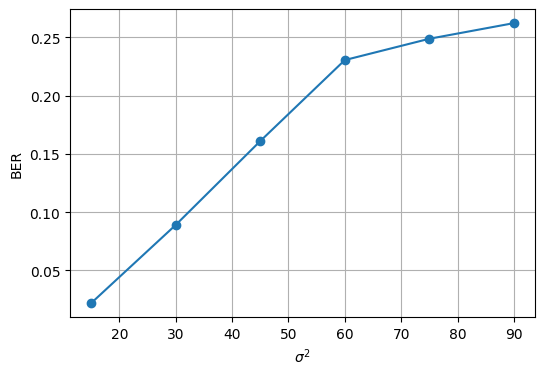

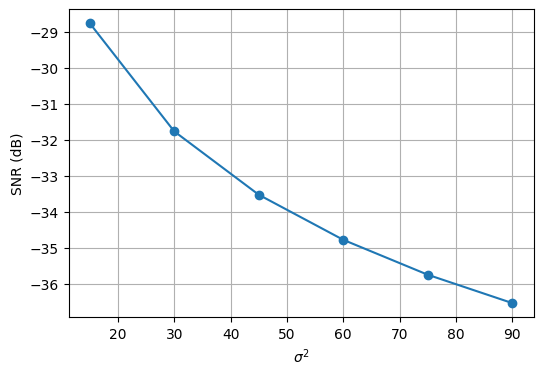

[np.float64(0.02195121951219512),
 np.float64(0.08902439024390243),
 np.float64(0.16097560975609757),
 np.float64(0.2304878048780488),
 np.float64(0.24878048780487805),
 np.float64(0.2621951219512195)]

In [154]:
import numpy as np
import matplotlib.pyplot as plt

def PulseShaping(seq, pulses):
    seq = np.asarray(seq, dtype=int)
    pulses = np.asarray(pulses)
    return pulses[seq].reshape(-1)

fs = 1_000_000
Ts = 10e-3
fc = 10_000
Ns = int(round(fs * Ts))
t = np.arange(Ns) / fs

delta_f = 1 / Ts
offsets = np.array([-1.5, -0.5, 0.5, 1.5]) * delta_f
tones = fc + offsets

m = {"00": 0, "01": 1, "10": 2, "11": 3}
inv = np.array(["00", "01", "10", "11"])
sym_idx = np.array([m[b] for b in dibits], dtype=int)

pulses = np.array([np.cos(2*np.pi*f*t) for f in tones])

x = PulseShaping(sym_idx, pulses)

A = 0.2
x = A * x

sigma2_vals = np.arange(15, 91, 15)
ber_vals = []
snr_db_vals = []

tx_bits = "".join(dibits.tolist())

for s2 in sigma2_vals:
    sigma = np.sqrt(s2)
    r = x + sigma*np.random.randn(len(x))

    n = r - x
    snr_lin = np.var(x) / np.var(n)
    snr_db = 10*np.log10(snr_lin)
    snr_db_vals.append(snr_db)

    n_sym = len(r) // Ns
    r_sym = r[:n_sym*Ns].reshape(n_sym, Ns)

    metrics = r_sym @ pulses.T
    sym_hat = np.argmax(np.abs(metrics), axis=1)
    dibits_hat = inv[sym_hat]

    rx_bits = "".join(dibits_hat.tolist())
    L = min(len(tx_bits), len(rx_bits))

    tx_arr = (np.array(list(tx_bits[:L])) == "1")
    rx_arr = (np.array(list(rx_bits[:L])) == "1")

    ber = np.mean(tx_arr != rx_arr)
    ber_vals.append(ber)

    print(f"sigma2={s2:>3}  SNR(dB)={snr_db:>7.2f}  BER={ber:.4f}")

plt.figure(figsize=(6, 4))
plt.plot(sigma2_vals, ber_vals, marker="o")
plt.xlabel(r"$\sigma^2$")
plt.ylabel("BER")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(sigma2_vals, snr_db_vals, marker="o")
plt.xlabel(r"$\sigma^2$")
plt.ylabel("SNR (dB)")
plt.grid(True)
plt.show()

ber_vals


FSK-C

σ²= 15 | mean(I)=  -36.73, mean(Q)=  -76.23 | std(I)=  788.09, std(Q)=  834.29
σ²= 30 | mean(I)=   -7.05, mean(Q)=  -72.37 | std(I)=  823.60, std(Q)=  951.56
σ²= 45 | mean(I)=  -66.91, mean(Q)=  -29.80 | std(I)=  962.51, std(Q)= 1051.35
σ²= 60 | mean(I)=   16.05, mean(Q)=  -66.82 | std(I)= 1038.60, std(Q)= 1089.90
σ²= 75 | mean(I)=   52.92, mean(Q)=  -36.55 | std(I)= 1019.11, std(Q)= 1116.92
σ²= 90 | mean(I)=   27.96, mean(Q)=   49.24 | std(I)= 1175.19, std(Q)= 1169.20


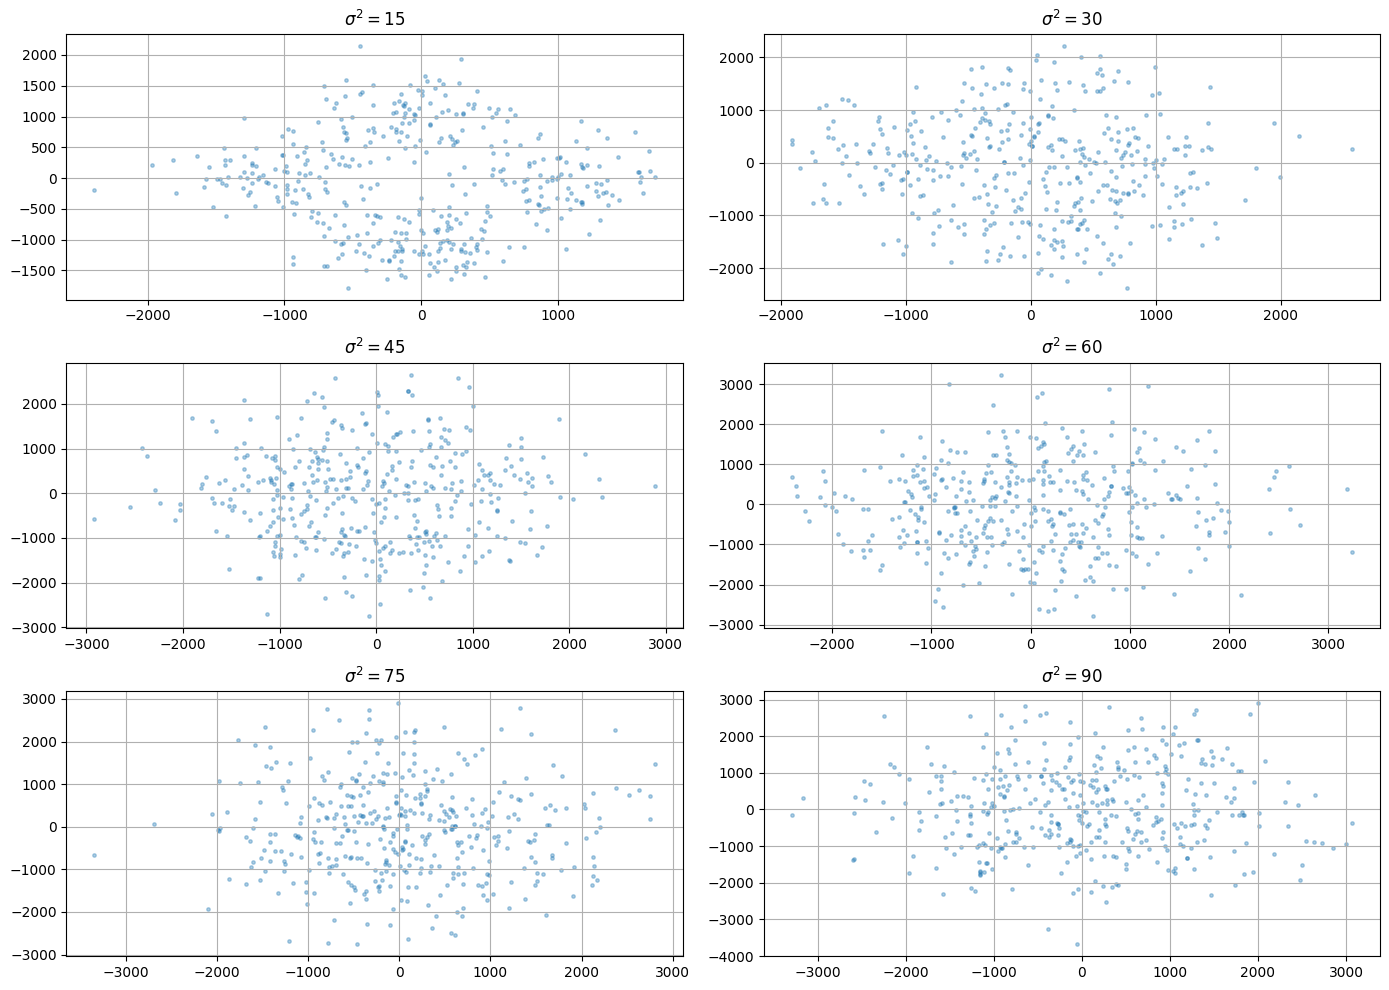

In [155]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1_000_000
Ts = 10e-3
fc = 10_000
Ns = int(round(fs * Ts))
t = np.arange(Ns) / fs

delta_f = 1 / Ts
offsets = np.array([-1.5, -0.5, 0.5, 1.5]) * delta_f
tones = fc + offsets

m = {"00": 0, "01": 1, "10": 2, "11": 3}
sym_idx = np.array([m[b] for b in dibits], dtype=int)

pulses = np.array([np.cos(2*np.pi*f*t) for f in tones])
x = PulseShaping(sym_idx, pulses)

A = 0.2
x = A * x

sigma2_vals = np.arange(15, 91, 15)

n_sym = len(x) // Ns

plt.figure(figsize=(14, 10))

for k, s2 in enumerate(sigma2_vals, start=1):
    sigma = np.sqrt(s2)

    r = x + sigma*np.random.randn(len(x))

    r_sym = r[:n_sym*Ns].reshape(n_sym, Ns)
    Z = r_sym @ pulses.T

    x_sc = Z[:, 0] - Z[:, 1]
    y_sc = Z[:, 2] - Z[:, 3]

    mean_I = np.mean(x_sc)
    mean_Q = np.mean(y_sc)
    std_I = np.std(x_sc)
    std_Q = np.std(y_sc)

    print(f"σ²={s2:>3} | mean(I)={mean_I:>8.2f}, mean(Q)={mean_Q:>8.2f} | std(I)={std_I:>8.2f}, std(Q)={std_Q:>8.2f}")

    ax = plt.subplot(3, 2, k)
    ax.scatter(x_sc, y_sc, s=6, alpha=0.35)
    ax.set_title(rf"$\sigma^2={s2}$")
    ax.grid(True)

plt.tight_layout()
plt.show()


FSK-d


EYE DIAGRAM (RECEIVED SIGNAL, BASEBAND AFTER DOWNCONVERSION)


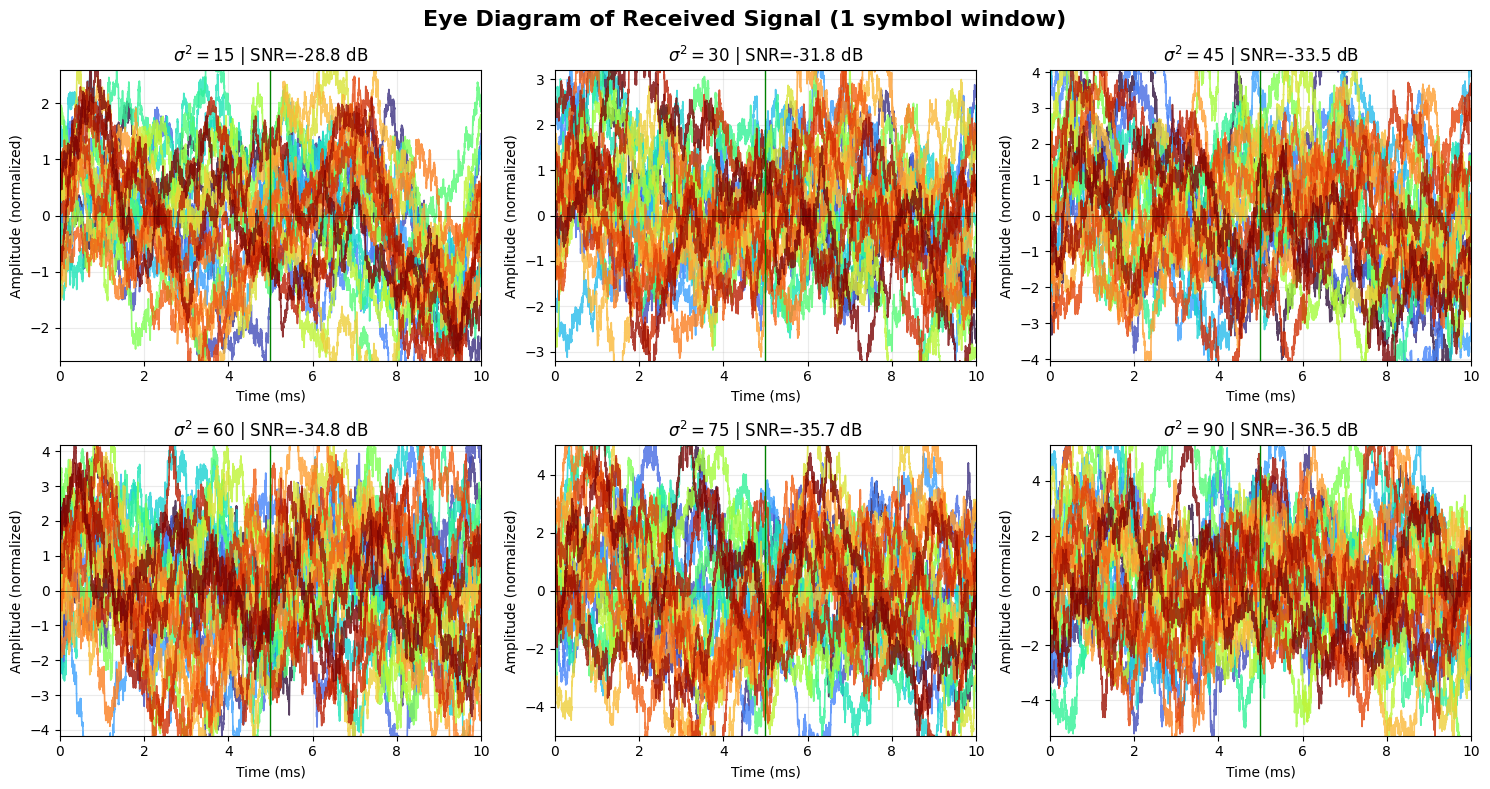

In [156]:
print("\n" + "="*70)
print("EYE DIAGRAM (RECEIVED SIGNAL, BASEBAND AFTER DOWNCONVERSION)")
print("="*70)

import numpy as np
import matplotlib.pyplot as plt

Fs = 1e6
Ts = 10e-3
Ns = int(round(Fs * Ts))
t_sym = np.arange(Ns) / Fs

delta_f = 1 / Ts
offsets = np.array([-1.5, -0.5, 0.5, 1.5]) * delta_f
tones = fc + offsets

m = {"00": 0, "01": 1, "10": 2, "11": 3}
sym_idx = np.array([m[b] for b in dibits], dtype=int)

pulses = np.array([np.cos(2*np.pi*f*t_sym) for f in tones])

A = 0.2
x = A * PulseShaping(sym_idx, pulses)

n_sym = len(x) // Ns
x = x[:n_sym*Ns]
sym_idx = sym_idx[:n_sym]

variances = [15, 30, 45, 60, 75, 90]

eye_len = Ns
time_eye = np.arange(eye_len) / Fs * 1000

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle("Eye Diagram of Received Signal (1 symbol window)", fontsize=16, fontweight="bold")

np.random.seed(1)
starts = np.arange(5, min(n_sym-5, 80))
if len(starts) > 25:
    starts = np.random.choice(starts, size=25, replace=False)
starts = np.sort(starts)

L = int(Ns / 10)
if L % 2 == 0:
    L += 1
lp = np.ones(L) / L

ref_scale = None

for i, s2 in enumerate(variances):
    sigma = np.sqrt(s2)
    r = x + sigma * np.random.randn(len(x))

    tt = np.arange(len(r)) / Fs
    I = r * np.cos(2*np.pi*fc*tt)
    Q = r * (-np.sin(2*np.pi*fc*tt))

    I = np.convolve(I, lp, mode="same")
    Q = np.convolve(Q, lp, mode="same")

    y = I

    if ref_scale is None:
        r0 = x
        tt0 = np.arange(len(r0)) / Fs
        I0 = r0 * np.cos(2*np.pi*fc*tt0)
        I0 = np.convolve(I0, lp, mode="same")
        ref_scale = np.max(np.abs(I0)) + 1e-12

    y = y / ref_scale
    y = y - np.mean(y)

    ax = axes[i//3, i%3]
    colors = plt.cm.turbo(np.linspace(0, 1, len(starts)))

    for k, s in enumerate(starts):
        seg = y[s*Ns:(s+1)*Ns]
        if len(seg) == eye_len:
            ax.plot(time_eye, seg, color=colors[k], alpha=0.8, linewidth=1.2)

    ax.axvline(Ts*1000/2, color="green", linewidth=1)
    ax.axhline(0, color="black", linewidth=0.7, alpha=0.6)

    lim = 1.2 * np.percentile(np.abs(y[starts[0]*Ns:(starts[-1]+1)*Ns]), 95)
    ax.set_ylim([-lim, lim])

    sig_pow = np.var(x)
    snr_db = 10*np.log10(sig_pow / s2)
    ax.set_title(rf"$\sigma^2={s2}$ | SNR={snr_db:.1f} dB")

    ax.set_xlabel("Time (ms)")
    ax.set_ylabel("Amplitude (normalized)")
    ax.grid(True, alpha=0.25)
    ax.set_xlim([0, Ts*1000])

plt.tight_layout()
plt.show()


For 4-FSK, the received signal in time domain does not naturally form a clean eye, because symbols differ by frequency, not amplitude. So if we plot the raw received waveform (or downconverted I) in 1-symbol windows, it will look messy by nature.

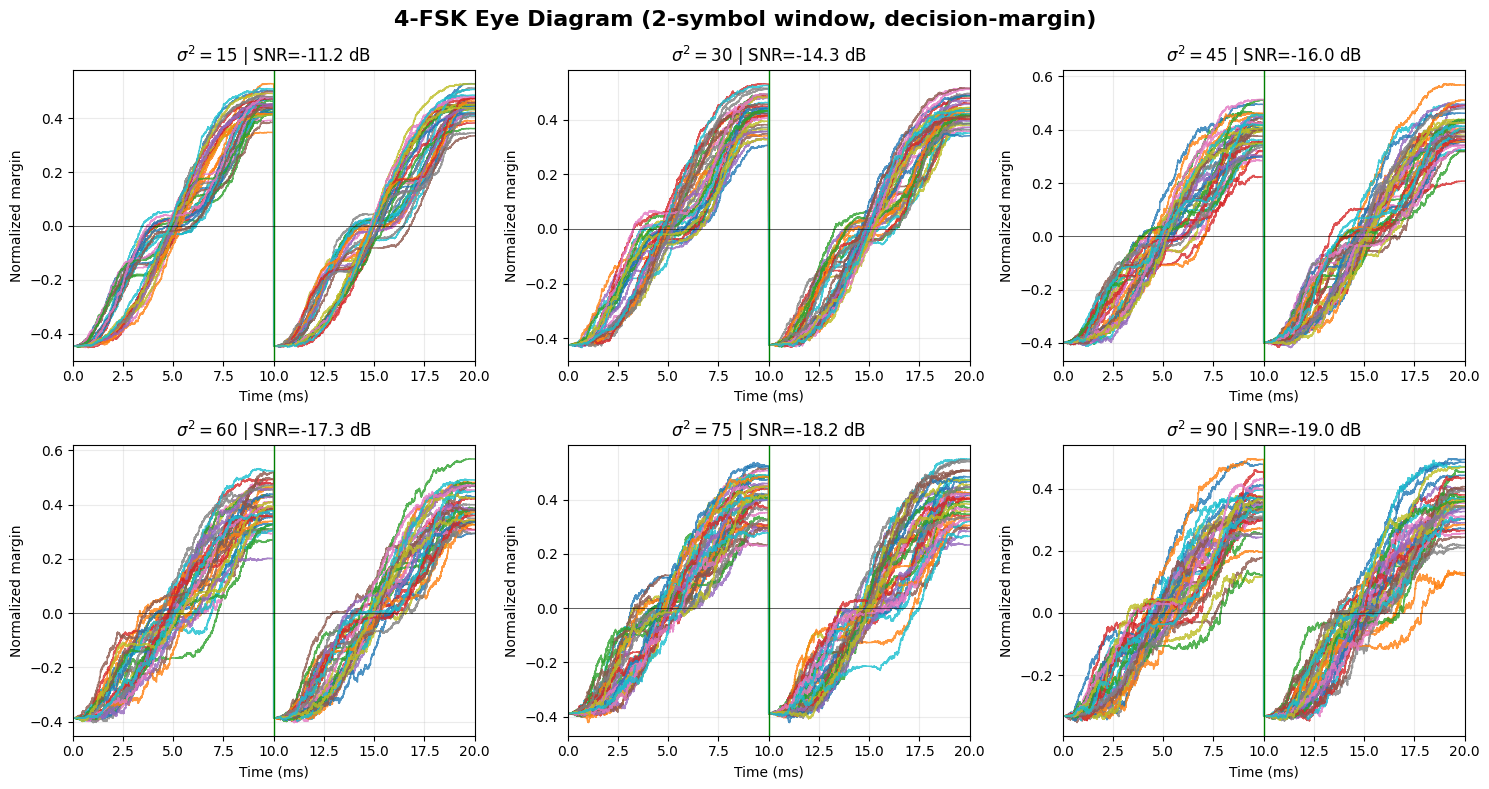

In [157]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1_000_000
Ts = 10e-3
Ns = int(round(fs * Ts))
t = np.arange(Ns) / fs

delta_f = 1 / Ts
offsets = np.array([-1.5, -0.5, 0.5, 1.5]) * delta_f
tones = fc + offsets

m = {"00": 0, "01": 1, "10": 2, "11": 3}
sym_idx = np.array([m[b] for b in dibits], dtype=int)

pulses = np.array([np.cos(2*np.pi*f*t) for f in tones])

A = 1.5
x = A * PulseShaping(sym_idx, pulses)

n_sym = len(x) // Ns
x = x[:n_sym*Ns]
sym_idx = sym_idx[:n_sym]

def fsk_margin_trace(r_sym, pulses, sym_idx):
    z = np.cumsum(r_sym[:, None, :] * pulses[None, :, :], axis=2)
    z_end = z[:, :, -1]
    idx_sorted = np.argsort(z_end, axis=1)
    best = idx_sorted[:, -1]
    second = idx_sorted[:, -2]
    margin = z[np.arange(len(r_sym)), best, :] - z[np.arange(len(r_sym)), second, :]
    return margin

sigma2_vals = [15, 30, 45, 60, 75, 90]
time_eye = (np.arange(2*Ns) / fs) * 1000

np.random.seed(2)
starts = np.arange(5, min(n_sym-5, 200))
if len(starts) > 40:
    starts = np.random.choice(starts, size=40, replace=False)
starts = np.sort(starts)

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle("4-FSK Eye Diagram (2-symbol window, decision-margin)", fontsize=16, fontweight="bold")

for i, s2 in enumerate(sigma2_vals):
    sigma = np.sqrt(s2)
    r = x + sigma*np.random.randn(len(x))
    r_sym = r.reshape(n_sym, Ns)

    margin = fsk_margin_trace(r_sym, pulses, sym_idx)
    margin = margin / (np.max(np.abs(margin)) + 1e-12)
    margin = margin - np.mean(margin)

    ax = axes[i//3, i%3]

    for s in starts:
        if s+2 <= n_sym:
            seg = np.concatenate([margin[s], margin[s+1]])
            ax.plot(time_eye, seg, alpha=0.8, linewidth=1.1)

    ax.axvline(Ts*1000, color="green", linewidth=1)
    ax.axhline(0, color="black", linewidth=0.7, alpha=0.6)

    snr_db = 10*np.log10(np.var(x) / s2)
    ax.set_title(rf"$\sigma^2={s2}$ | SNR={snr_db:.1f} dB")
    ax.set_xlabel("Time (ms)")
    ax.set_ylabel("Normalized margin")
    ax.grid(True, alpha=0.25)
    ax.set_xlim([0, 2*Ts*1000])

plt.tight_layout()
plt.show()


In FSK, information is carried in frequency, so the raw received waveform does not produce a classical eye diagram (unlike PAM/QPSK/QAM).

Therefore, an “eye” equivalent is plotted at the output of the matched-filter/correlator bank over one symbol interval.

As noise variance increases, the separation between the correct tone’s decision variable and competitors decreases (eye closes), which explains the BER increase.

---------------------------------

QPSK- theory question answered:  
In Quadrature Phase Shift Keying (QPSK), two bits are transmitted per symbol. Since each symbol contains two bits, there are four possible bit pairs: 00, 01, 10, and 11. Therefore, four different signals must be selected to represent these four combinations.

In QPSK, all transmitted signals have the same amplitude and carrier frequency, and they differ only in their phase. The general form of the transmitted signal is:  
si(t) = Acos(2pifct + phi(i))
where A is the amplitude of the carrier, fc is the carrier frequencu and phi(i) is the phase assigned to each symbol.  
To distinguish between the four bit pairs and ensure reliable detection at the receiver, four phase values are selected with equal spacing of 90 degrees. This equal spacing makes the signals orthogonal and minimizes the probability of error in the presence of noise. The selected phases are typically:  
phi(i) belongs to {0, pi/2, pi, 3pi/2}  
Each phase corresponds to one two-bit symbol.   
These signals can also be represented using two orthogonal basis functions called the in-phase (I) and quadrature (Q) components. Each symbol is generated by combining cosine and sine carriers:  
s(t) = Icos(2pifct) + Qsin(2pifct)
where I and Q take values of +A or -A. Each pair of bits determines the sign of the I and Q components, resulting in four distince constellation points.   
Thus, in QPSK, the signals for each pair of bits are chosen as carrier waves with identical amplitude and frequency but different phases separated by 90 degrees. This allows transmission of two bits per symbol while maintaining robustness against noise and efficient use of bandwidth.


QPSK-a

In [158]:
L = 150

data = generate_data(L)
codes, tree = Huffman_code(symbols, p)
bitstream = source_coder(data, codes, symbols)

pad = (-len(bitstream)) % 4
bitstream_padded = bitstream + "0"*pad

hamming_bits = Hamming_coder(bitstream_padded)

print(data)
print(bitstream)
print(hamming_bits)


CGBEDFDHGCDBIAABBBCAEADBABBBAFGADDAGDCIAGCEBAABBACACFEBCCACAAFABGHBBEBAAAEICABBGAACABACGIDBBAFABAFCFCDBFCCDCBIABFGAEAABCABGDFCBBGBEABBHCBDDGFBBFACDGAB
1101111100111001001110101111011111110010000110110100000001101011101001000100000001001111111110010010101111101011001101101111111011100010100000101101011001111110001101101011010100111100011111111100000111000101010111001101110100000111111010110100010110111110110101000001001111000100111110011111001000011111011001011000011011000011111111101110101000110100011111010011111000001111100111010000011110110000100101111101110000011110110010111111000
1010101111111110000110011001100001110110101111111000111111111110101010110100101100111001100000000011001100110011101101010011001001100000000010011001111111111111100110010101010011001100101100110011100001111001101111111001011000101100101010111000001010101010101110011000011110010110100001111001100110011010010110000110111100000111111111110111100110100101111000100101010010101111001010101101010100000000001111001

QPSK-b

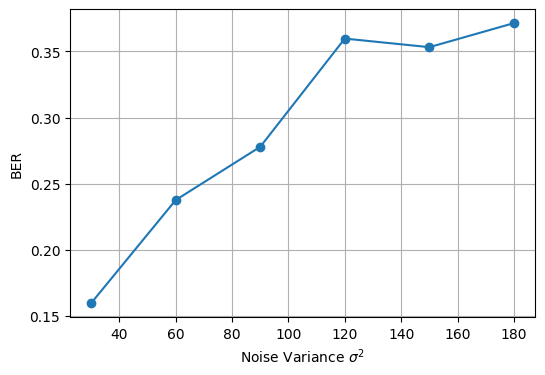

[np.float64(0.15974025974025974),
 np.float64(0.23766233766233766),
 np.float64(0.2779220779220779),
 np.float64(0.35974025974025975),
 np.float64(0.35324675324675325),
 np.float64(0.37142857142857144)]

In [159]:
import numpy as np
import matplotlib.pyplot as plt

def PulseShaping(bits01, Ns, mapping="gray"):
    b = np.array(bits01, dtype=int).reshape(-1, 2)
    if mapping == "gray":
        I = 1 - 2*b[:,0]
        Q = 1 - 2*b[:,1]
    else:
        I = 2*b[:,0] - 1
        Q = 2*b[:,1] - 1
    s = (I + 1j*Q) / np.sqrt(2)
    return np.repeat(s, Ns)

def AnalogMod(xbb, fc, fs):
    n = len(xbb)
    t = np.arange(n) / fs
    return np.real(xbb * np.exp(1j*2*np.pi*fc*t))

def awgn_channel(x, length_km, sigma):
    att_dB = 1.0 * length_km
    alpha = 10 ** (-att_dB / 20.0)
    x = alpha * np.asarray(x, dtype=float)
    return x + sigma * np.random.randn(len(x))

def qpsk_demod_bits(r, fc, fs, Ns):
    n_sym = len(r) // Ns
    r = r[:n_sym*Ns].reshape(n_sym, Ns)
    t = np.arange(Ns) / fs
    c = np.cos(2*np.pi*fc*t)
    s = np.sin(2*np.pi*fc*t)

    I_hat = (2.0/Ns) * (r @ c)
    Q_hat = (2.0/Ns) * (r @ (-s))

    b0 = (I_hat < 0).astype(int)
    b1 = (Q_hat < 0).astype(int)

    out = np.empty(2*n_sym, dtype=int)
    out[0::2] = b0
    out[1::2] = b1
    return out

fs = 1_000_000
Ts = 10e-3
fc = 10_000
Ns = int(round(fs * Ts))

tx_bits = np.array(list(map(int, list(hamming_bits))), dtype=int)
pad2 = (-len(tx_bits)) % 2
if pad2:
    tx_bits = np.concatenate([tx_bits, np.zeros(pad2, dtype=int)])

xbb = PulseShaping(tx_bits, Ns, mapping="gray")
x = AnalogMod(xbb, fc, fs)
A = 0.1
x = A * x


sigma2_vals = np.arange(30, 181, 30)
ber_vals = []

np.random.seed(0)
for s2 in sigma2_vals:
    r = awgn_channel(x, length_km=0, sigma=np.sqrt(s2))
    rx_bits = qpsk_demod_bits(r, fc, fs, Ns)
    Lb = min(len(tx_bits), len(rx_bits))
    ber_vals.append(np.mean(tx_bits[:Lb] != rx_bits[:Lb]))

plt.figure(figsize=(6,4))
plt.plot(sigma2_vals, ber_vals, marker="o")
plt.xlabel(r"Noise Variance $\sigma^2$")
plt.ylabel("BER")
plt.grid(True)
plt.show()

ber_vals


QPSK-c

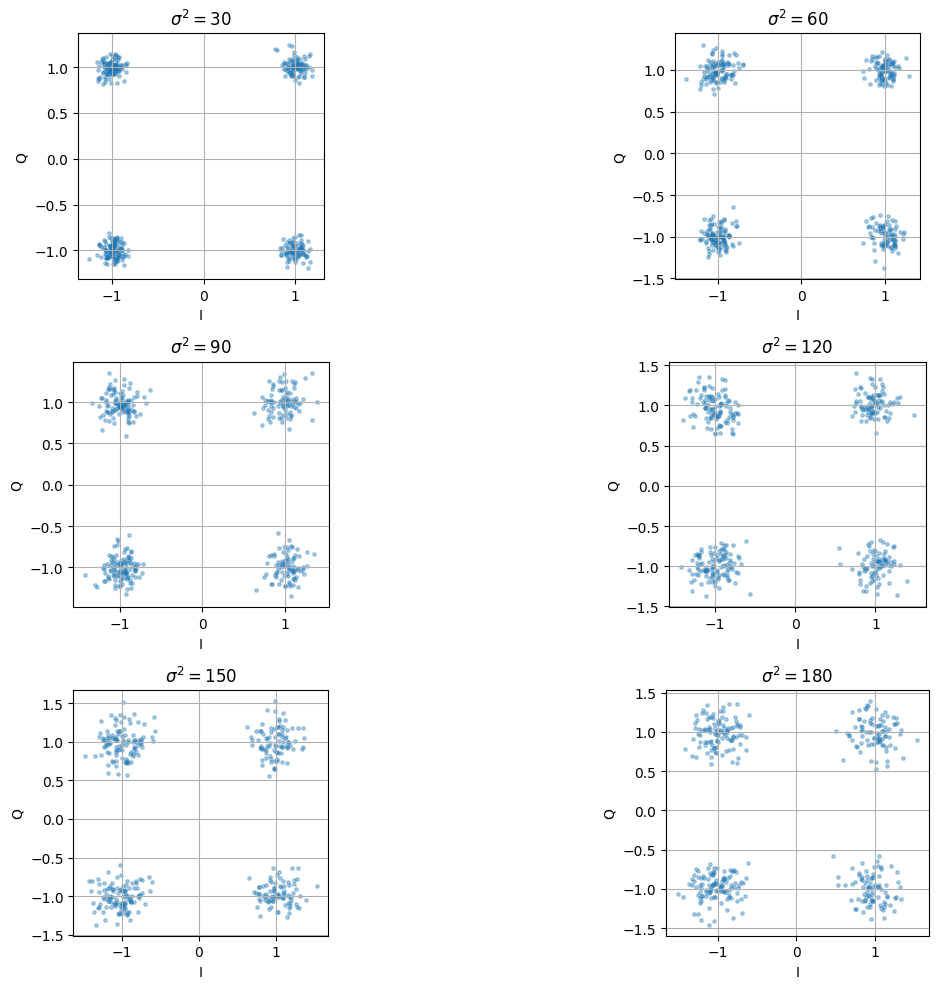

In [160]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1_000_000
Ts = 10e-3
fc = 10_000
Ns = int(round(fs * Ts))

tx_bits = np.array(list(map(int, list(hamming_bits))), dtype=int)
pad2 = (-len(tx_bits)) % 2
if pad2:
    tx_bits = np.concatenate([tx_bits, np.zeros(pad2, dtype=int)])

b = tx_bits.reshape(-1, 2)
I_sym = 1 - 2*b[:,0]
Q_sym = 1 - 2*b[:,1]
s_sym = (I_sym + 1j*Q_sym) / np.sqrt(2)

xbb = np.repeat(s_sym, Ns)
x = AnalogMod(xbb, fc, fs)

x = x / np.sqrt(np.mean(x**2))

sigma2_sel = [30, 60, 90, 120, 150, 180]

plt.figure(figsize=(14, 10))

for k, s2 in enumerate(sigma2_sel, start=1):
    r = awgn_channel(x, length_km=0, sigma=np.sqrt(s2))

    n_sym = len(r) // Ns
    rr = r[:n_sym*Ns].reshape(n_sym, Ns)

    t = np.arange(Ns) / fs
    c = np.cos(2*np.pi*fc*t)
    s = np.sin(2*np.pi*fc*t)

    I_hat = (2.0/Ns) * (rr @ c)
    Q_hat = (2.0/Ns) * (rr @ (-s))

    ax = plt.subplot(3, 2, k)
    ax.scatter(I_hat, Q_hat, s=6, alpha=0.35)
    ax.set_title(rf"$\sigma^2={s2}$")
    ax.grid(True)
    ax.set_xlabel("I")
    ax.set_ylabel("Q")
    ax.set_aspect("equal", "box")

plt.tight_layout()
plt.show()


The constellation diagrams illustrate the effect of additive white Gaussian noise (AWGN) on the received QPSK signal for different noise variances. In QPSK modulation, each symbol is represented by one of four constellation points in the I–Q plane, corresponding to four possible pairs of bits. Ideally, these points are located at fixed positions with equal spacing, forming a square constellation.

For low noise variance (σ² = 30), the received symbols are tightly clustered around the ideal constellation points. This indicates that the noise level is low and the receiver can correctly distinguish between symbols with high accuracy. As the noise variance increases (σ² = 60 and σ² = 90), the clusters begin to spread due to the stronger influence of noise on the received signal. Although the symbols are still mostly distinguishable, the probability of error increases.

At higher noise variances (σ² = 120, 150, and 180), the dispersion of points becomes more significant. The clusters become wider and start to overlap slightly, making it more difficult for the receiver to correctly detect the transmitted symbols. This increased overlap between constellation regions leads to a higher bit error rate (BER).

Overall, the constellation diagrams clearly demonstrate how increasing noise variance degrades signal quality and increases detection errors. The visual spreading of constellation points is consistent with the BER results obtained in the previous section, confirming the impact of channel noise on QPSK system performance.

QPSK-d

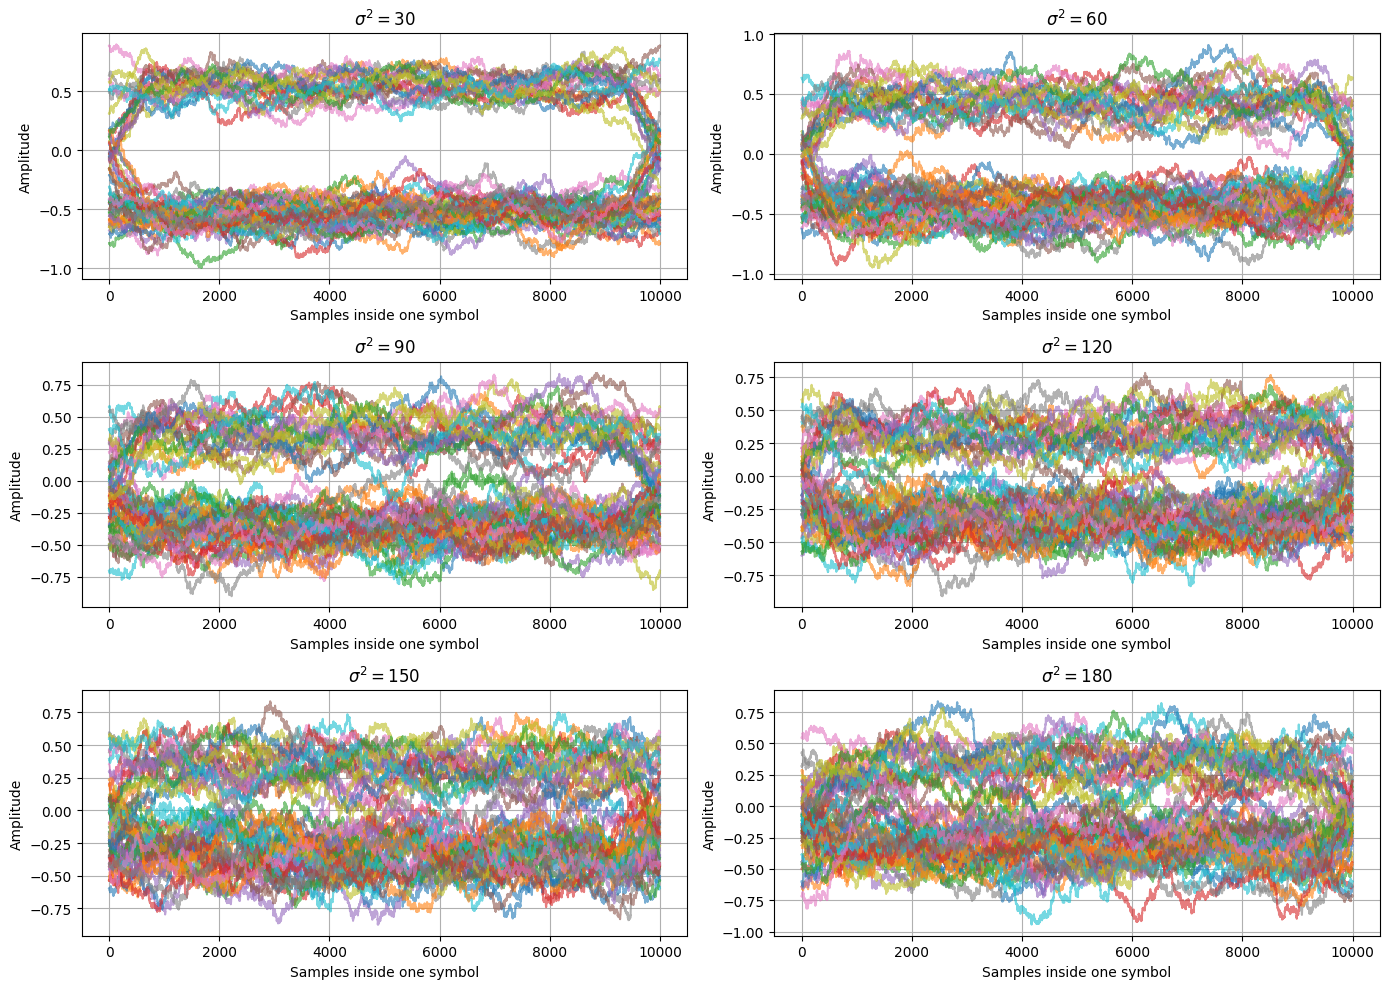

In [161]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1_000_000
Ts = 10e-3
fc = 10_000
Ns = int(round(fs * Ts))

tx_bits = np.array(list(map(int, list(hamming_bits))), dtype=int)
pad2 = (-len(tx_bits)) % 2
if pad2:
    tx_bits = np.concatenate([tx_bits, np.zeros(pad2, dtype=int)])

b = tx_bits.reshape(-1, 2)
I_sym = 1 - 2*b[:,0]
Q_sym = 1 - 2*b[:,1]
s_sym = (I_sym + 1j*Q_sym) / np.sqrt(2)

xbb = np.repeat(s_sym, Ns)
x = AnalogMod(xbb, fc, fs)
x = x / np.sqrt(np.mean(x**2))

sigma2_sel = [30, 60, 90, 120, 150, 180]

plt.figure(figsize=(14, 10))

for k, s2 in enumerate(sigma2_sel, start=1):
    r = awgn_channel(x, length_km=0, sigma=np.sqrt(s2))

    n = len(r)
    t = np.arange(n) / fs
    I = r * np.cos(2*np.pi*fc*t)
    Q = r * (-np.sin(2*np.pi*fc*t))

    L = int(Ns/8)
    if L % 2 == 0:
        L += 1
    lp = np.ones(L)/L

    I = np.convolve(I, lp, mode="same")
    Q = np.convolve(Q, lp, mode="same")

    I = I / (np.max(np.abs(I)) + 1e-12)

    n_sym = len(I)//Ns
    I = I[:n_sym*Ns].reshape(n_sym, Ns)

    ax = plt.subplot(3,2,k)
    for i in range(min(60, n_sym-1)):
        ax.plot(I[i], alpha=0.6)

    ax.set_title(rf"$\sigma^2={s2}$")
    ax.set_xlabel("Samples inside one symbol")
    ax.set_ylabel("Amplitude")
    ax.grid(True)

plt.tight_layout()
plt.show()


The eye diagram illustrates the effect of noise on the received QPSK signal in the time domain. For low noise variance, the eye opening is wide and clearly visible, indicating that the receiver can easily distinguish between symbol levels at the sampling instant. The decision region is therefore well defined and the probability of error is low.

As the noise variance increases, the eye opening gradually becomes smaller. The signal trajectories become more dispersed due to the presence of AWGN, which introduces amplitude fluctuations and timing uncertainty. At high noise levels, the eye becomes partially closed, indicating increased inter-symbol interference and noise distortion. This makes symbol detection more difficult and leads to higher BER.

The eye diagrams are consistent with the constellation plots and BER results. When noise variance is low, constellation points are tightly clustered and the eye is open. As noise increases, constellation points spread and the eye diagram closes, confirming the degradation of system performance in noisy channel conditions.

The eye diagrams show the effect of noise on the received QPSK signal in the time domain. For low noise variance, the eye opening is wide and clearly visible, indicating a large noise margin and reliable symbol detection. As the noise variance increases, the traces become more scattered and the eye gradually closes, reducing the distance between signal levels and increasing the probability of error.

The optimal sampling instant occurs near the center of each symbol where the eye opening is maximum. With higher noise levels, this region becomes less distinct and timing tolerance decreases. Since the channel is assumed ideal, the main factor affecting the eye diagram is AWGN rather than inter-symbol interference. Overall, the reduction in eye opening with increasing noise variance is consistent with the observed increase in BER and degradation of system performance.

------------------------------

16-QAM Theory explanation:  
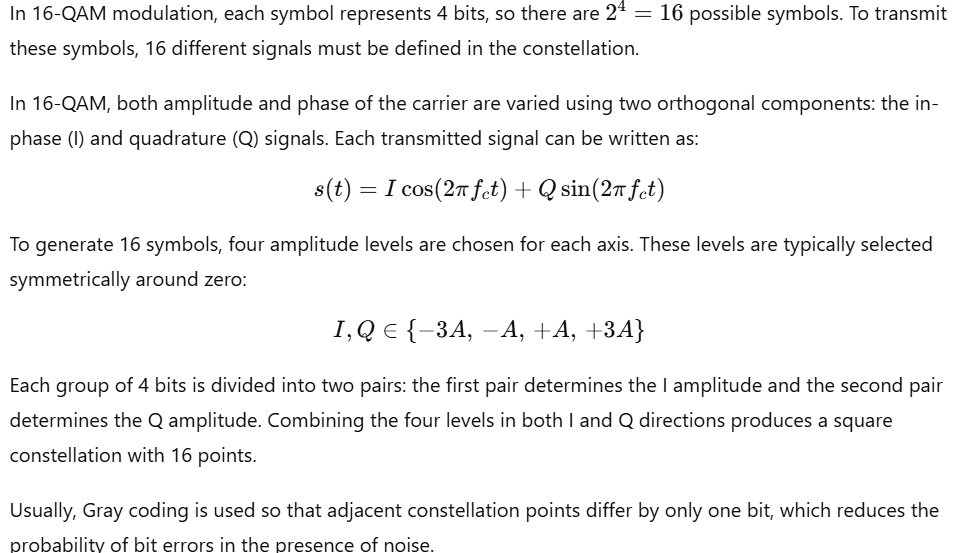

16-QAM a

In [162]:
L = 150

data = generate_data(L)

codes, tree = Huffman_code(symbols, p)
bitstream = source_coder(data, codes, symbols)

pad = (-len(bitstream)) % 4
bitstream_padded = bitstream + "0"*pad

hamming_bits = Hamming_coder(bitstream_padded)

print(data)
print(bitstream)
print(hamming_bits)


AEFJCIBJBGJFGFBCCGICBAHCABGABDDBFIAAFICHFJCAFBFABDCBGDDIFFFCCCAHCBDBADJBDBCEACBBFAFHAABAGAABCBHBGAECHBCGFAAGBBGAEBAAADIACFABCBAABABEAFBEBAFBBDBCACAJEF
101110011101100110011010001100001111101100011111111011100110110111110110111000101111011010001111110000100100001110110110100111011011101111001110110011010011100011110000101100011111010010011010111011101111101101101011110110000100010010011000001000110111010110000001111001111111010100010111111010001100011110001111110111011011110001101111101111010111110000111111011100010101001001101101100111100011000101000100011101001110011100010011100000100011010110100110011100111
01100110011001101010100110010011001101101010000110000000111111101100111101001111111100101100010110110011010101011111111110011000101100101010111111111001101110000111111101111000101010100110010000110110011110011000110011010101011001101100110111100001011001111001010101100001111100001111111000000001100111101001111111110011000011001101101000101100010110111111101100111100110011001110101

16-QAM b

In this section, a sequence of source symbols is generated and encoded using Huffman source coding and Hamming channel coding. The resulting bitstream is grouped into 4-bit symbols, since each 16-QAM symbol represents four bits of information.

Each group of 4 bits is mapped to one of 16 constellation points using two amplitude levels for the in-phase (I) and quadrature (Q) components. The mapped symbols are pulse-shaped and modulated onto a carrier signal to generate the transmitted waveform. The signal is then passed through an AWGN channel where Gaussian noise with different variances is added.

At the receiver, the signal is demodulated using coherent detection and matched filtering. The received symbols are mapped back to their nearest constellation points and converted to bits. Finally, the bit error rate (BER) is calculated by comparing the transmitted and received bit sequences for different noise variances. The BER is then plotted versus noise variance to analyze system performance under noisy channel conditions.

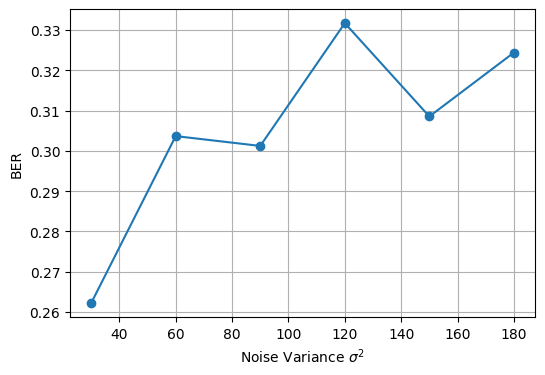

[np.float64(0.2621951219512195),
 np.float64(0.30365853658536585),
 np.float64(0.30121951219512194),
 np.float64(0.33170731707317075),
 np.float64(0.30853658536585366),
 np.float64(0.32439024390243903)]

In [163]:
import numpy as np
import matplotlib.pyplot as plt

def PulseShaping_16QAM(bits, Ns):
    b = np.array(bits, dtype=int).reshape(-1,4)

    def map2(x,y):
        if (x,y)==(0,0): return -3
        if (x,y)==(0,1): return -1
        if (x,y)==(1,1): return 1
        if (x,y)==(1,0): return 3

    I = np.array([map2(x,y) for x,y in b[:,0:2]])
    Q = np.array([map2(x,y) for x,y in b[:,2:4]])

    s = (I + 1j*Q)/np.sqrt(10)
    return np.repeat(s, Ns)

def AnalogMod(xbb, fc, fs):
    n = len(xbb)
    t = np.arange(n)/fs
    return np.real(xbb*np.exp(1j*2*np.pi*fc*t))

def qam16_demod(r, fc, fs, Ns):
    n_sym = len(r)//Ns
    r = r[:n_sym*Ns].reshape(n_sym, Ns)

    t = np.arange(Ns)/fs
    c = np.cos(2*np.pi*fc*t)
    s = np.sin(2*np.pi*fc*t)

    I_hat = (2.0/Ns)*(r @ c)
    Q_hat = (2.0/Ns)*(r @ (-s))

    levels = np.array([-3,-1,1,3])

    def quant(x):
        return levels[np.argmin(np.abs(x-levels[:,None]), axis=0)]

    Iq = quant(I_hat)
    Qq = quant(Q_hat)

    def demap(v):
        if v==-3: return [0,0]
        if v==-1: return [0,1]
        if v==1:  return [1,1]
        if v==3:  return [1,0]

    bits_out=[]
    for i,q in zip(Iq,Qq):
        bits_out += demap(i) + demap(q)

    return np.array(bits_out)

fs = 1_000_000
Ts = 10e-3
fc = 10_000
Ns = int(round(fs*Ts))

tx_bits = np.array(list(map(int, list(hamming_bits))), dtype=int)
pad4 = (-len(tx_bits)) % 4
if pad4:
    tx_bits = np.concatenate([tx_bits, np.zeros(pad4, dtype=int)])

xbb = PulseShaping_16QAM(tx_bits, Ns)
x = AnalogMod(xbb, fc, fs)
x = x/np.sqrt(np.mean(x**2))
A = 0.2 
x = A * x

sigma2_vals = np.arange(30,181,30)
ber_vals=[]

np.random.seed(0)

for s2 in sigma2_vals:
    r = awgn_channel(x, 0, np.sqrt(s2))
    rx_bits = qam16_demod(r, fc, fs, Ns)

    Lb = min(len(tx_bits), len(rx_bits))
    ber = np.mean(tx_bits[:Lb] != rx_bits[:Lb])
    ber_vals.append(ber)

plt.figure(figsize=(6,4))
plt.plot(sigma2_vals, ber_vals, marker='o')
plt.xlabel(r"Noise Variance $\sigma^2$")
plt.ylabel("BER")
plt.grid(True)
plt.show()

ber_vals


16-QAM should generally have worse BER than QPSK at the same noise, because it has smaller minimum distance between constellation points. Your BER range here being relatively high is consistent with that.

16-QAM c

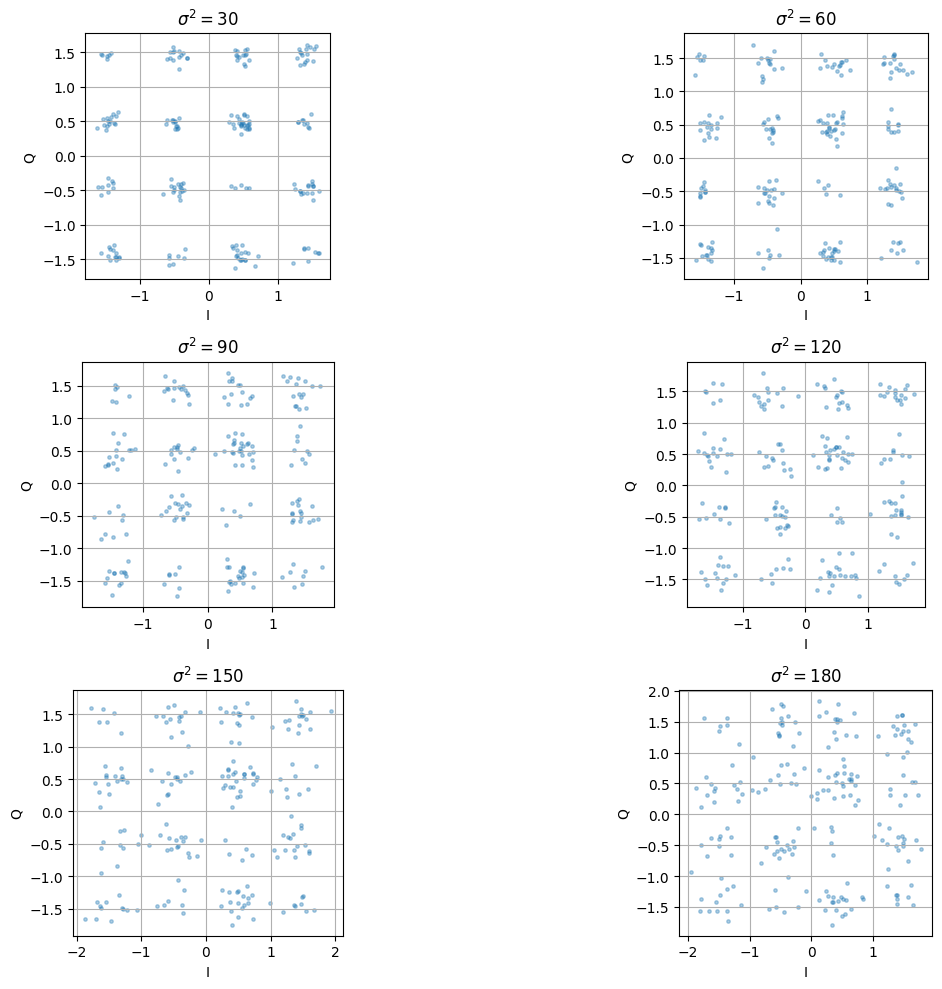

In [164]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1_000_000
Ts = 10e-3
fc = 10_000
Ns = int(round(fs * Ts))

tx_bits = np.array(list(map(int, list(hamming_bits))), dtype=int)
pad4 = (-len(tx_bits)) % 4
if pad4:
    tx_bits = np.concatenate([tx_bits, np.zeros(pad4, dtype=int)])

b = tx_bits.reshape(-1,4)

def map2(x,y):
    if (x,y)==(0,0): return -3
    if (x,y)==(0,1): return -1
    if (x,y)==(1,1): return 1
    if (x,y)==(1,0): return 3

I = np.array([map2(x,y) for x,y in b[:,0:2]])
Q = np.array([map2(x,y) for x,y in b[:,2:4]])

s_sym = (I + 1j*Q)/np.sqrt(10)
xbb = np.repeat(s_sym, Ns)

x = AnalogMod(xbb, fc, fs)
x = 1.5 * x

sigma2_sel = [30,60,90,120,150,180]

plt.figure(figsize=(14,10))

for k, s2 in enumerate(sigma2_sel, start=1):
    r = awgn_channel(x, 0, np.sqrt(s2))

    n_sym = len(r)//Ns
    rr = r[:n_sym*Ns].reshape(n_sym, Ns)

    t = np.arange(Ns)/fs
    c = np.cos(2*np.pi*fc*t)
    s = np.sin(2*np.pi*fc*t)

    I_hat = (2.0/Ns)*(rr @ c)
    Q_hat = (2.0/Ns)*(rr @ (-s))

    ax = plt.subplot(3,2,k)
    ax.scatter(I_hat, Q_hat, s=6, alpha=0.35)
    ax.set_title(rf"$\sigma^2={s2}$")
    ax.set_xlabel("I")
    ax.set_ylabel("Q")
    ax.grid(True)
    ax.set_aspect("equal","box")

plt.tight_layout()
plt.show()


The constellation diagrams illustrate the received 16-QAM symbols for different noise variances.
For low noise variance, the received points are clustered around the 16 ideal constellation locations, allowing accurate symbol detection. As the noise variance increases, the clusters spread due to the effect of AWGN and gradually begin to overlap.

Since 16-QAM uses multiple amplitude levels, it is more sensitive to noise compared to QPSK. At higher noise variances, the constellation becomes highly dispersed and the distance between constellation regions effectively decreases, which leads to increased symbol errors and higher BER.

The constellation behavior is consistent with the BER results obtained in the previous section.

16-QAM d

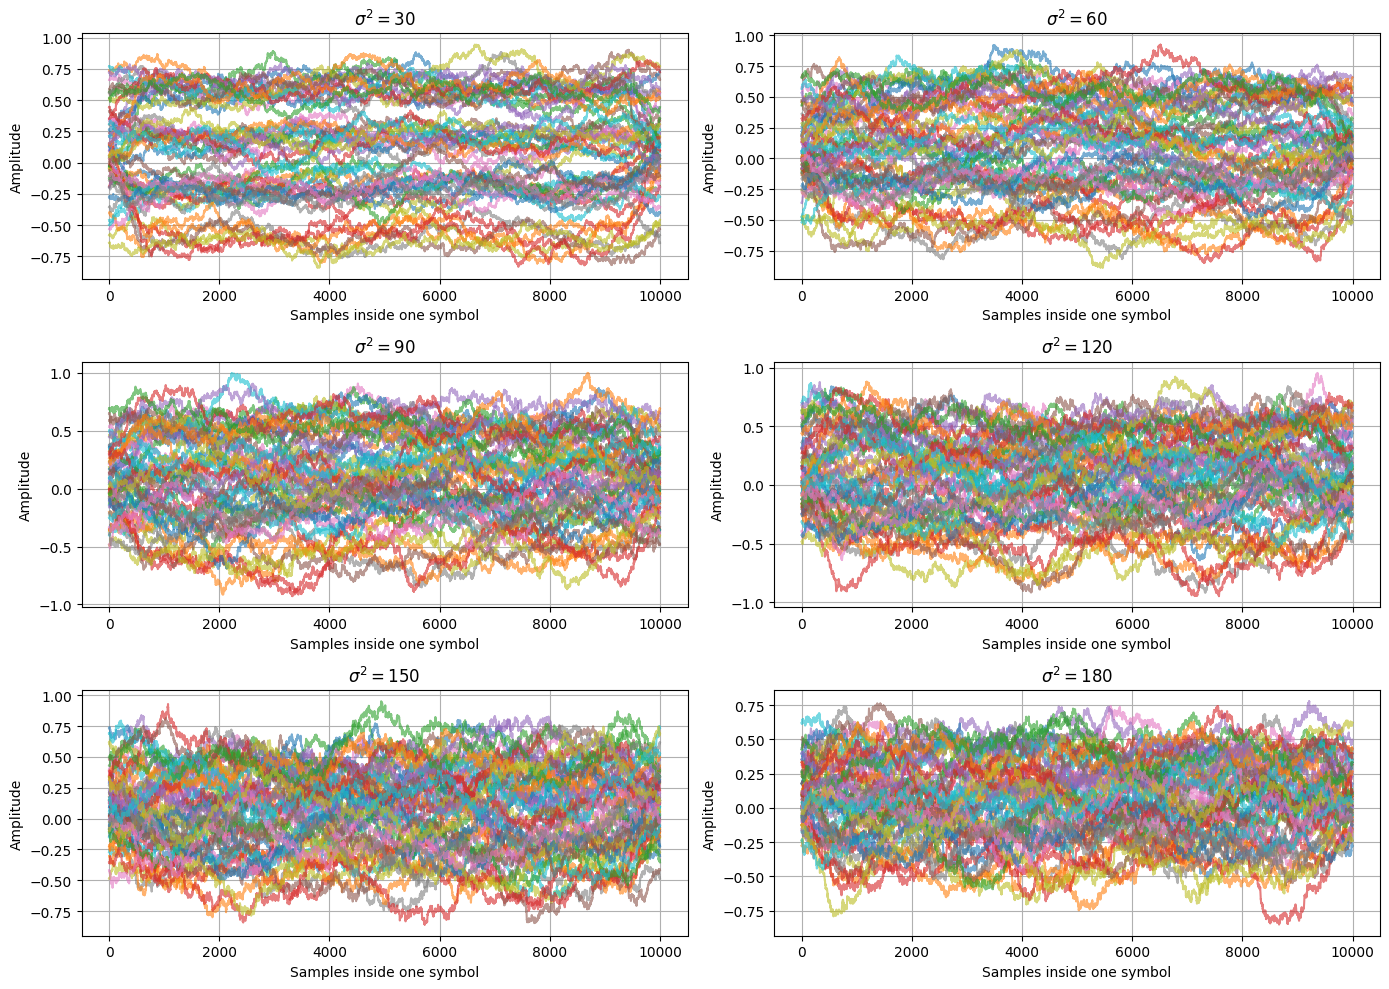

In [165]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1_000_000
Ts = 10e-3
fc = 10_000
Ns = int(round(fs * Ts))

tx_bits = np.array(list(map(int, list(hamming_bits))), dtype=int)
pad4 = (-len(tx_bits)) % 4
if pad4:
    tx_bits = np.concatenate([tx_bits, np.zeros(pad4, dtype=int)])

b = tx_bits.reshape(-1,4)

def map2(x,y):
    if (x,y)==(0,0): return -3
    if (x,y)==(0,1): return -1
    if (x,y)==(1,1): return 1
    if (x,y)==(1,0): return 3

I = np.array([map2(x,y) for x,y in b[:,0:2]])
Q = np.array([map2(x,y) for x,y in b[:,2:4]])

s_sym = (I + 1j*Q)/np.sqrt(10)
xbb = np.repeat(s_sym, Ns)

x = AnalogMod(xbb, fc, fs)
x = 1.5 * x

sigma2_sel = [30,60,90,120,150,180]

plt.figure(figsize=(14,10))

for k, s2 in enumerate(sigma2_sel, start=1):
    r = awgn_channel(x, 0, np.sqrt(s2))

    n = len(r)
    t = np.arange(n)/fs
    Irec = r*np.cos(2*np.pi*fc*t)

    L = int(Ns/8)
    if L % 2 == 0:
        L += 1
    lp = np.ones(L)/L
    Irec = np.convolve(Irec, lp, mode="same")

    Irec = Irec/(np.max(np.abs(Irec))+1e-12)

    n_sym = len(Irec)//Ns
    Irec = Irec[:n_sym*Ns].reshape(n_sym, Ns)

    ax = plt.subplot(3,2,k)
    for i in range(min(60,n_sym-1)):
        ax.plot(Irec[i], alpha=0.6)

    ax.set_title(rf"$\sigma^2={s2}$")
    ax.set_xlabel("Samples inside one symbol")
    ax.set_ylabel("Amplitude")
    ax.grid(True)

plt.tight_layout()
plt.show()


The eye diagrams illustrate the received signal for different noise variances. For low noise levels, the eye opening is clearly visible and signal levels are distinguishable, allowing reliable symbol detection. As the noise variance increases, the trajectories become more dispersed and the eye gradually closes due to the effect of AWGN.

Because 16-QAM uses multiple amplitude levels, it is more sensitive to noise compared to QPSK. At higher noise levels, the eye becomes significantly distorted and the separation between signal levels decreases, increasing the probability of detection errors. The eye diagram behavior is consistent with the constellation plots and BER results.

----------------------------------------

Part 3.1 

First I should remind that because I have written the PulseShaping for 4-fsk and qpsk with the same name in the above codes, I am revising them here so they won't get mixed.  
The function of the different parts of my systems was once checked in the previous parts.  
Now I am about to create a single common input and apply those three demodulation techniques and see the result.  


In [166]:
L = 150

data = generate_data(L)
codes, tree = Huffman_code(symbols, p)
bitstream = source_coder(data, codes, symbols)

pad = (-len(bitstream)) % 4
bitstream_padded = bitstream + "0"*pad

hamming_bits = Hamming_coder(bitstream_padded)


In [167]:
import numpy as np

def PulseShaping_FSK(seq, pulses):
    seq = np.asarray(seq, dtype=int)
    pulses = np.asarray(pulses)
    return pulses[seq].reshape(-1)

def PulseShaping_QPSK(bits01, Ns, mapping="gray"):
    b = np.array(bits01, dtype=int).reshape(-1, 2)
    if mapping == "gray":
        I = 1 - 2*b[:,0]
        Q = 1 - 2*b[:,1]
    else:
        I = 2*b[:,0] - 1
        Q = 2*b[:,1] - 1
    s = (I + 1j*Q) / np.sqrt(2)
    return np.repeat(s, Ns)

def PulseShaping_16QAM(bits, Ns):
    b = np.array(bits, dtype=int).reshape(-1,4)
    def map2(x,y):
        if (x,y)==(0,0): return -3
        if (x,y)==(0,1): return -1
        if (x,y)==(1,1): return 1
        if (x,y)==(1,0): return 3
    I = np.array([map2(x,y) for x,y in b[:,0:2]])
    Q = np.array([map2(x,y) for x,y in b[:,2:4]])
    s = (I + 1j*Q)/np.sqrt(10)
    return np.repeat(s, Ns)


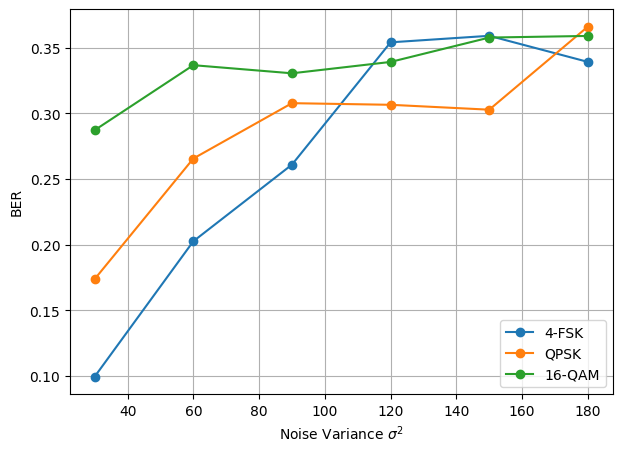

([np.float64(0.09937888198757763),
  np.float64(0.20248447204968945),
  np.float64(0.2608695652173913),
  np.float64(0.35403726708074534),
  np.float64(0.3590062111801242),
  np.float64(0.3391304347826087)],
 [np.float64(0.17369727047146402),
  np.float64(0.2655086848635236),
  np.float64(0.3076923076923077),
  np.float64(0.3064516129032258),
  np.float64(0.3027295285359802),
  np.float64(0.36600496277915634)],
 [np.float64(0.2871287128712871),
  np.float64(0.33663366336633666),
  np.float64(0.33044554455445546),
  np.float64(0.33910891089108913),
  np.float64(0.35767326732673266),
  np.float64(0.3589108910891089)])

In [168]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1_000_000
Ts = 10e-3
fc = 10_000
Ns = int(round(fs * Ts))

sigma2_vals = np.arange(30, 181, 30)

tx_bits = np.array(list(map(int, list(hamming_bits))), dtype=int)

ber_fsk = []
ber_qpsk = []
ber_qam16 = []

np.random.seed(0)

for s2 in sigma2_vals:
    sigma = np.sqrt(s2)

    dib = tx_bits.copy()
    if len(dib) % 2 != 0:
        dib = np.concatenate([dib, [0]])
    dib = np.array(["".join(map(str, dib[i:i+2])) for i in range(0, len(dib), 2)])

    t = np.arange(Ns) / fs
    delta_f = 1 / Ts
    offsets = np.array([-1.5, -0.5, 0.5, 1.5]) * delta_f
    tones = fc + offsets

    m = {"00":0,"01":1,"10":2,"11":3}
    inv = np.array(["00","01","10","11"])
    sym_idx = np.array([m[b] for b in dib], dtype=int)

    pulses = np.array([np.cos(2*np.pi*f*t) for f in tones])
    x_fsk = PulseShaping_FSK(sym_idx, pulses)
    x_fsk = 0.2 * x_fsk

    r = x_fsk + sigma*np.random.randn(len(x_fsk))
    n_sym = len(r)//Ns
    r_sym = r[:n_sym*Ns].reshape(n_sym, Ns)

    metrics = r_sym @ pulses.T
    sym_hat = np.argmax(np.abs(metrics), axis=1)
    dibits_hat = inv[sym_hat]
    rx_bits_fsk = np.array(list(map(int, list("".join(dibits_hat.tolist())))))

    Lb = min(len(tx_bits), len(rx_bits_fsk))
    ber_fsk.append(np.mean(tx_bits[:Lb] != rx_bits_fsk[:Lb]))

    tx_q = tx_bits.copy()
    if len(tx_q) % 2 != 0:
        tx_q = np.concatenate([tx_q, [0]])

    xbb_q = PulseShaping_QPSK(tx_q, Ns)
    x_qpsk = AnalogMod(xbb_q, fc, fs)
    x_qpsk = 0.1 * x_qpsk

    r_q = awgn_channel(x_qpsk, 0, sigma)
    rx_bits_q = qpsk_demod_bits(r_q, fc, fs, Ns)

    Lb = min(len(tx_q), len(rx_bits_q))
    ber_qpsk.append(np.mean(tx_q[:Lb] != rx_bits_q[:Lb]))

    tx_16 = tx_bits.copy()
    pad4 = (-len(tx_16)) % 4
    if pad4:
        tx_16 = np.concatenate([tx_16, np.zeros(pad4, dtype=int)])

    xbb16 = PulseShaping_16QAM(tx_16, Ns)
    x_qam = AnalogMod(xbb16, fc, fs)
    x_qam = 0.2 * x_qam

    r16 = awgn_channel(x_qam, 0, sigma)
    rx_bits_16 = qam16_demod(r16, fc, fs, Ns)

    Lb = min(len(tx_16), len(rx_bits_16))
    ber_qam16.append(np.mean(tx_16[:Lb] != rx_bits_16[:Lb]))

plt.figure(figsize=(7,5))
plt.plot(sigma2_vals, ber_fsk, marker="o", label="4-FSK")
plt.plot(sigma2_vals, ber_qpsk, marker="o", label="QPSK")
plt.plot(sigma2_vals, ber_qam16, marker="o", label="16-QAM")
plt.xlabel(r"Noise Variance $\sigma^2$")
plt.ylabel("BER")
plt.grid(True)
plt.legend()
plt.show()

ber_fsk, ber_qpsk, ber_qam16


-----------------------------------

3.2.1  
Based on the BER results under similar noise conditions, QPSK shows the best performance among the three modulation schemes. For all tested noise variances, QPSK generally achieves the lowest bit error rate compared to 4-FSK and 16-QAM.

The 16-QAM modulation has higher BER because it uses multiple amplitude levels and its constellation points are closer together, making it more sensitive to noise. The 4-FSK scheme shows moderate performance but becomes less reliable at higher noise levels due to increased symbol detection errors.

Therefore, under the same noise conditions, QPSK provides the most reliable performance in terms of BER.

3.2.2  


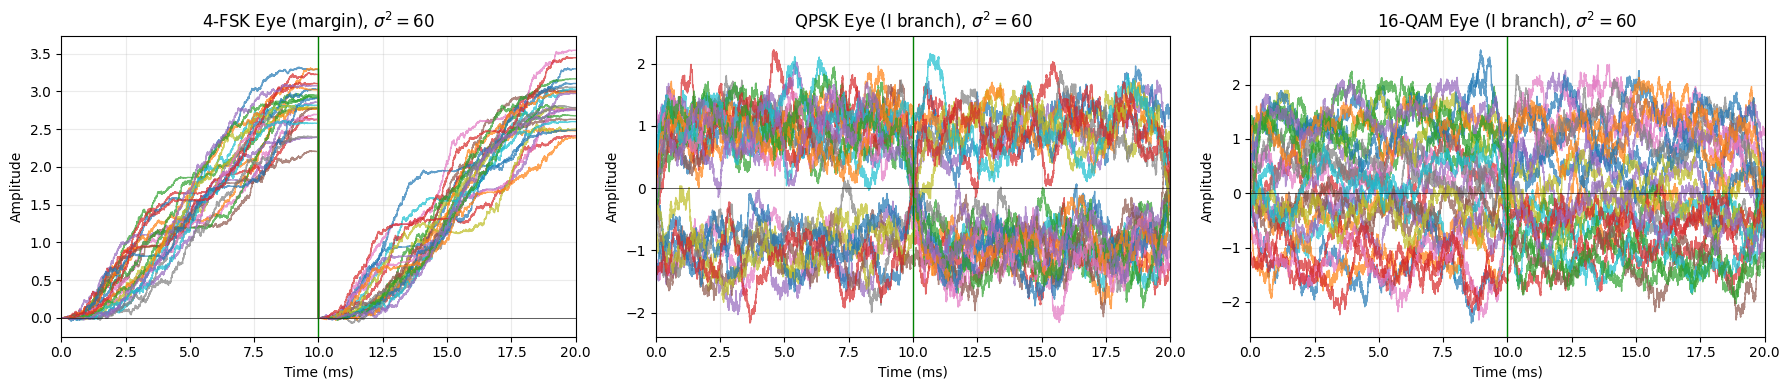

In [169]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1_000_000
Ts = 10e-3
fc = 10_000
Ns = int(round(fs * Ts))

sigma2 = 60
sigma = np.sqrt(sigma2)

tx_bits = np.array(list(map(int, list(hamming_bits))), dtype=int)

np.random.seed(0)

def eyeplot_time(ax, y, Ns, fs, ntr=25, title=""):
    n_sym = len(y)//Ns
    y = y[:n_sym*Ns].reshape(n_sym, Ns)
    starts = np.arange(2, min(n_sym-2, 120))
    if len(starts) > ntr:
        starts = np.random.choice(starts, size=ntr, replace=False)
    starts = np.sort(starts)
    tms = (np.arange(2*Ns)/fs)*1000
    for s in starts:
        seg = np.concatenate([y[s], y[s+1]])
        ax.plot(tms, seg, alpha=0.7, linewidth=1.0)
    ax.axvline(Ts*1000, color="green", linewidth=1)
    ax.axhline(0, color="black", linewidth=0.7, alpha=0.6)
    ax.set_title(title)
    ax.set_xlabel("Time (ms)")
    ax.set_ylabel("Amplitude")
    ax.grid(True, alpha=0.25)
    ax.set_xlim([0, 2*Ts*1000])

t = np.arange(Ns)/fs
delta_f = 1/Ts
offsets = np.array([-1.5, -0.5, 0.5, 1.5])*delta_f
tones = fc + offsets
pulses = np.array([np.cos(2*np.pi*f*t) for f in tones])

dib = tx_bits.copy()
if len(dib) % 2 != 0:
    dib = np.concatenate([dib, [0]])
dib = np.array(["".join(map(str, dib[i:i+2])) for i in range(0, len(dib), 2)])
m = {"00":0,"01":1,"10":2,"11":3}
sym_idx = np.array([m[b] for b in dib], dtype=int)

A_fsk = 1.5
x_fsk = A_fsk * PulseShaping_FSK(sym_idx, pulses)
r_fsk = x_fsk + sigma*np.random.randn(len(x_fsk))
r_sym = r_fsk.reshape(-1, Ns)

z = np.cumsum(r_sym[:,None,:] * pulses[None,:,:], axis=2)
z_end = z[:,:,-1]
idx_sorted = np.argsort(z_end, axis=1)
best = idx_sorted[:,-1]
second = idx_sorted[:,-2]
margin = z[np.arange(len(r_sym)), best, :] - z[np.arange(len(r_sym)), second, :]
margin = margin / (np.std(margin) + 1e-12)
margin = margin.reshape(-1)

tx_q = tx_bits.copy()
if len(tx_q) % 2 != 0:
    tx_q = np.concatenate([tx_q, [0]])
A_qpsk = 1.5
xbb_q = PulseShaping_QPSK(tx_q, Ns)
x_qpsk = A_qpsk * AnalogMod(xbb_q, fc, fs)
r_qpsk = awgn_channel(x_qpsk, 0, sigma)

tt = np.arange(len(r_qpsk))/fs
I_q = r_qpsk*np.cos(2*np.pi*fc*tt)
Llp = int(Ns/12)
if Llp % 2 == 0:
    Llp += 1
lp = np.ones(Llp)/Llp
I_q = np.convolve(I_q, lp, mode="same")
I_q = I_q / (np.std(I_q) + 1e-12)

tx_16 = tx_bits.copy()
pad4 = (-len(tx_16)) % 4
if pad4:
    tx_16 = np.concatenate([tx_16, np.zeros(pad4, dtype=int)])
A_qam = 1.5
xbb_16 = PulseShaping_16QAM(tx_16, Ns)
x_16 = A_qam * AnalogMod(xbb_16, fc, fs)
r_16 = awgn_channel(x_16, 0, sigma)

tt16 = np.arange(len(r_16))/fs
I_16 = r_16*np.cos(2*np.pi*fc*tt16)
I_16 = np.convolve(I_16, lp, mode="same")
I_16 = I_16 / (np.std(I_16) + 1e-12)

fig, axes = plt.subplots(1, 3, figsize=(18, 4))
eyeplot_time(axes[0], margin, Ns, fs, ntr=25, title=r"4-FSK Eye (margin), $\sigma^2=60$")
eyeplot_time(axes[1], I_q, Ns, fs, ntr=25, title=r"QPSK Eye (I branch), $\sigma^2=60$")
eyeplot_time(axes[2], I_16, Ns, fs, ntr=25, title=r"16-QAM Eye (I branch), $\sigma^2=60$")

plt.tight_layout()
plt.show()


QPSK:  
The QPSK eye diagram shows the clearest eye opening among the three modulation methods. Two main amplitude levels are visible and the eye remains relatively open around the sampling instant. This indicates good noise tolerance and reliable symbol detection. The clear separation between levels results in lower probability of decision errors and therefore better BER performance.  

16-QAM:  
The 16-QAM eye diagram exhibits multiple amplitude levels corresponding to its multi-level constellation. Although the eye is still partially open, the trajectories are more dispersed and the separation between levels is smaller compared to QPSK. This makes the system more sensitive to noise and increases the probability of symbol errors. The reduced eye opening explains the higher BER observed for 16-QAM.  

4-FSK:  
The 4-FSK eye diagram (based on decision margin) shows noticeable fluctuations and a less stable opening around the sampling instant. The eye opening is narrower and more affected by noise compared to QPSK. This indicates that noise significantly affects frequency detection, especially at higher variances, leading to increased symbol detection errors.  

At σ² = 60, the eye opening for QPSK is the largest and most stable, indicating the best noise robustness. The 16-QAM eye is more distorted due to its multiple amplitude levels, while 4-FSK shows moderate performance but is more affected by noise than QPSK. These observations are consistent with the BER results obtained earlier, where QPSK demonstrated the most reliable performance under similar noise conditions.

-----------------------------

3.2.3

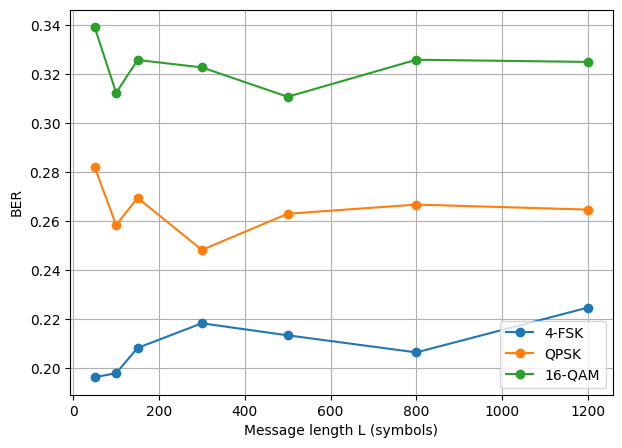

([np.float64(0.19642857142857142),
  np.float64(0.1980952380952381),
  np.float64(0.20838794233289645),
  np.float64(0.21844971172325434),
  np.float64(0.21353383458646616),
  np.float64(0.20656370656370657),
  np.float64(0.22485301128237725)],
 [np.float64(0.28214285714285714),
  np.float64(0.2585551330798479),
  np.float64(0.2696335078534031),
  np.float64(0.24839948783610755),
  np.float64(0.2631578947368421),
  np.float64(0.2668918918918919),
  np.float64(0.2648554178582777)],
 [np.float64(0.3392857142857143),
  np.float64(0.3125),
  np.float64(0.32591623036649214),
  np.float64(0.32289002557544755),
  np.float64(0.31090225563909774),
  np.float64(0.3260135135135135),
  np.float64(0.32512706480304954)])

In [170]:
import numpy as np
import matplotlib.pyplot as plt


fs = 1_000_000
Ts = 10e-3
fc = 10_000
Ns = int(round(fs * Ts))

sigma2 = 60
sigma = np.sqrt(sigma2)

L_vals = [50, 100, 150, 300, 500, 800, 1200]

A_fsk = 0.2
A_qpsk = 0.1
A_qam = 0.2

ber_fsk = []
ber_qpsk = []
ber_qam16 = []

np.random.seed(0)

for L in L_vals:
    data = generate_data(L)
    codes, tree = Huffman_code(symbols, p)
    bitstream = source_coder(data, codes, symbols)
    pad = (-len(bitstream)) % 4
    bitstream_padded = bitstream + "0"*pad
    hamming_bits = Hamming_coder(bitstream_padded)
    tx_bits = np.array(list(map(int, list(hamming_bits))), dtype=int)

    dib = tx_bits.copy()
    if len(dib) % 2 != 0:
        dib = np.concatenate([dib, [0]])
    dib = np.array(["".join(map(str, dib[i:i+2])) for i in range(0, len(dib), 2)])

    t = np.arange(Ns)/fs
    delta_f = 1/Ts
    offsets = np.array([-1.5, -0.5, 0.5, 1.5])*delta_f
    tones = fc + offsets
    pulses = np.array([np.cos(2*np.pi*f*t) for f in tones])

    m = {"00":0,"01":1,"10":2,"11":3}
    inv = np.array(["00","01","10","11"])
    sym_idx = np.array([m[b] for b in dib], dtype=int)

    x_fsk = A_fsk * PulseShaping_FSK(sym_idx, pulses)
    r_fsk = x_fsk + sigma*np.random.randn(len(x_fsk))
    n_sym = len(r_fsk)//Ns
    r_sym = r_fsk[:n_sym*Ns].reshape(n_sym, Ns)
    metrics = r_sym @ pulses.T
    sym_hat = np.argmax(np.abs(metrics), axis=1)
    dib_hat = inv[sym_hat]
    rx_bits_fsk = np.array(list(map(int, list("".join(dib_hat.tolist())))))
    Lb = min(len(tx_bits), len(rx_bits_fsk))
    ber_fsk.append(np.mean(tx_bits[:Lb] != rx_bits_fsk[:Lb]))

    tx_q = tx_bits.copy()
    if len(tx_q) % 2 != 0:
        tx_q = np.concatenate([tx_q, [0]])
    xbb_q = PulseShaping_QPSK(tx_q, Ns)
    x_qpsk = A_qpsk * AnalogMod(xbb_q, fc, fs)
    r_qpsk = awgn_channel(x_qpsk, 0, sigma)
    rx_bits_qpsk = qpsk_demod_bits(r_qpsk, fc, fs, Ns)
    Lb = min(len(tx_q), len(rx_bits_qpsk))
    ber_qpsk.append(np.mean(tx_q[:Lb] != rx_bits_qpsk[:Lb]))

    tx_16 = tx_bits.copy()
    pad4 = (-len(tx_16)) % 4
    if pad4:
        tx_16 = np.concatenate([tx_16, np.zeros(pad4, dtype=int)])
    xbb_16 = PulseShaping_16QAM(tx_16, Ns)
    x_16 = A_qam * AnalogMod(xbb_16, fc, fs)
    r_16 = awgn_channel(x_16, 0, sigma)
    rx_bits_16 = qam16_demod(r_16, fc, fs, Ns)
    Lb = min(len(tx_16), len(rx_bits_16))
    ber_qam16.append(np.mean(tx_16[:Lb] != rx_bits_16[:Lb]))

plt.figure(figsize=(7,5))
plt.plot(L_vals, ber_fsk, marker="o", label="4-FSK")
plt.plot(L_vals, ber_qpsk, marker="o", label="QPSK")
plt.plot(L_vals, ber_qam16, marker="o", label="16-QAM")
plt.xlabel("Message length L (symbols)")
plt.ylabel("BER")
plt.grid(True)
plt.legend()
plt.show()

ber_fsk, ber_qpsk, ber_qam16


Increasing the message length 
L does not significantly change the true BER of the modulation schemes but improves the accuracy of BER estimation. For small 
L, BER fluctuates due to limited data, while for larger 
L the results become more stable. QPSK shows the best performance, 4-FSK has moderate performance, and 16-QAM has the highest BER due to higher sensitivity to noise.

Part 4.1.1 and 4.1.2

Start speaking...
Recording finished
File saved as my_voice_8k.wav


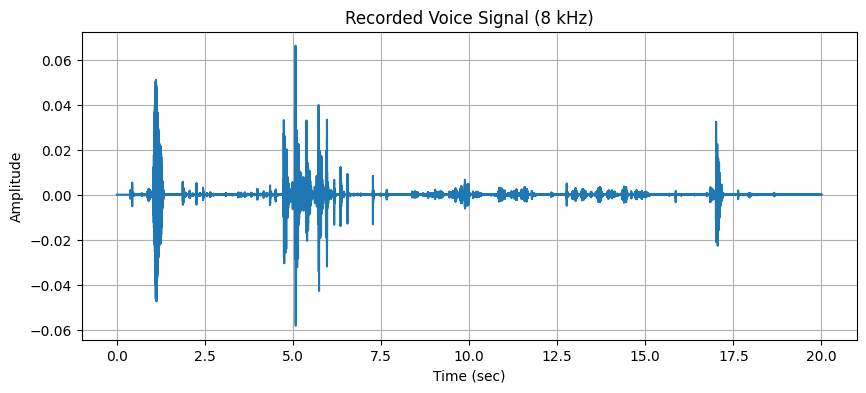

In [171]:
import sounddevice as sd
import numpy as np
from scipy.io.wavfile import write
import matplotlib.pyplot as plt

fs = 8000          # sampling frequency (8 kHz)
duration = 20      # seconds (minimum required)

print("Start speaking...")
x = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype='float32')
sd.wait()
print("Recording finished")

# convert to 1D
x = x[:, 0]

# save wav file
write("my_voice_8k.wav", fs, (x * 32767).astype(np.int16))

print("File saved as my_voice_8k.wav")

# plot signal
t = np.arange(len(x)) / fs
plt.figure(figsize=(10,4))
plt.plot(t, x)
plt.title("Recorded Voice Signal (8 kHz)")
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


4.1.3

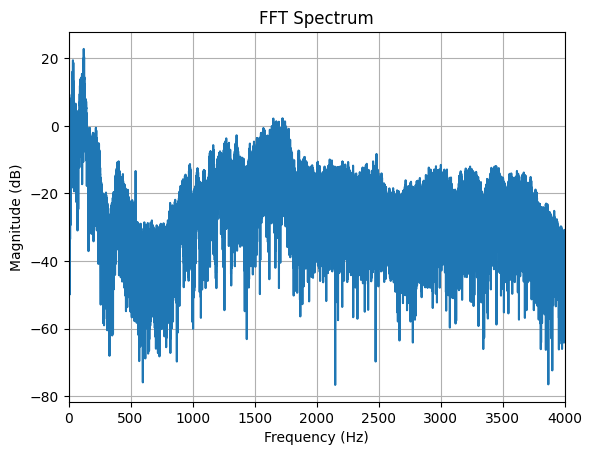

29.400000000000002 1737.2 122.55000000000001


In [172]:
X = np.fft.rfft(x * np.hanning(len(x)))
f = np.fft.rfftfreq(len(x), 1/fs)

mag = np.abs(X)
mag_db = 20*np.log10(mag + 1e-12)

plt.figure()
plt.plot(f, mag_db)
plt.xlim(0, 4000)
plt.grid(True)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.title("FFT Spectrum")
plt.show()

power = mag**2
cum = np.cumsum(power) / np.sum(power)
f_low = f[np.searchsorted(cum, 0.025)]
f_high = f[np.searchsorted(cum, 0.975)]
peak_f = f[np.argmax(mag)]

print(f_low, f_high, peak_f)


-------------------------------------------

4.2.1  
This function implements a uniform quantizer for PCM. First, the number of quantization levels is determined by the number of bits (L = 2 ^(N_bits)). The dynamic range of the input signal is obtained from its maximum absolute value, and the quantization step size (Δ) is calculated. Each sample of the signal is then mapped to the nearest quantization level by computing its index and limiting it within the valid range. Finally, the quantized signal is reconstructed from the quantization levels and returned along with the quantization indices and step size.

In [173]:
import numpy as np

def UniformQuantizer(x, N_bits):
    L = 2**N_bits
    
    xmax = np.max(np.abs(x))
    xmin = -xmax
    
    delta = (xmax - xmin) / L
    
    q_ind = np.floor((x - xmin) / delta)
    q_ind = np.clip(q_ind, 0, L-1)
    
    xq = xmin + (q_ind + 0.5)*delta
    
    return xq, q_ind, delta


4.2.2  
The input speech signal is passed through a uniform quantizer with 8 bits per sample (256 levels). The quantizer maps each sample to the nearest discrete amplitude level. The plot compares the original signal with the quantized signal, showing the small distortion introduced by quantization.

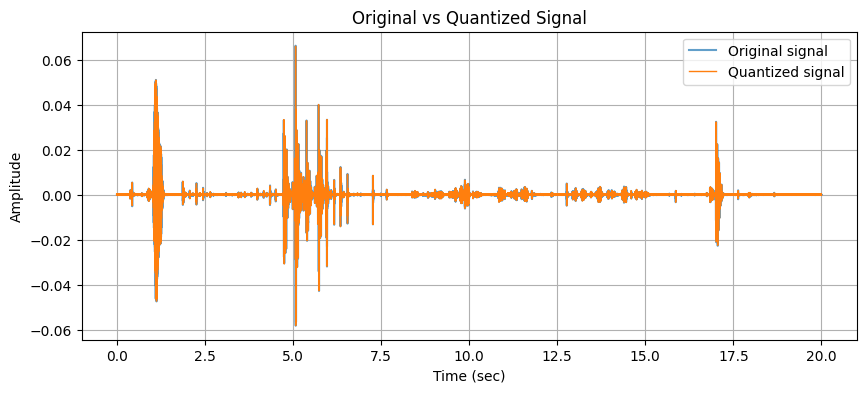

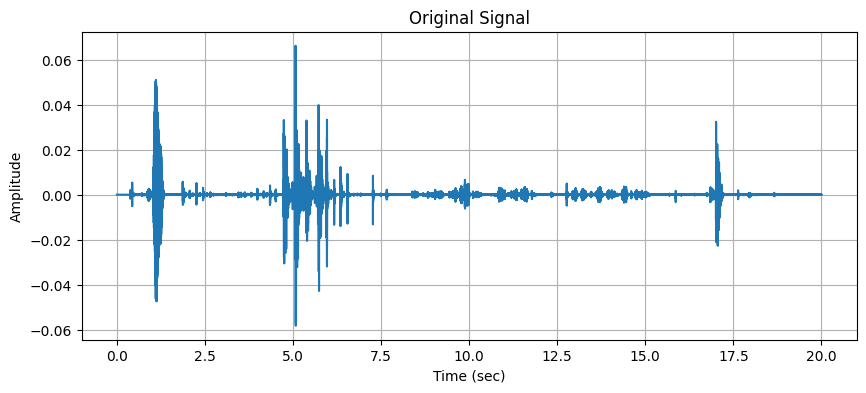

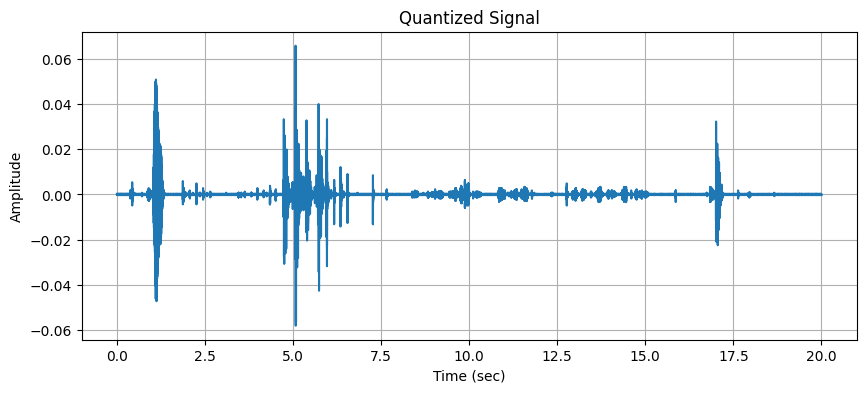

In [174]:
xq, q_ind, delta = UniformQuantizer(x, 8)

t = np.arange(len(x)) / fs

plt.figure(figsize=(10,4))
plt.plot(t, x, label="Original signal", alpha=0.7)
plt.plot(t, xq, label="Quantized signal", linewidth=1)
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.title("Original vs Quantized Signal")
plt.legend()
plt.grid(True)
plt.show()

xq, q_ind, delta = UniformQuantizer(x, 8)

t = np.arange(len(x)) / fs

plt.figure(figsize=(10,4))
plt.plot(t, x)
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.title("Original Signal")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,4))
plt.plot(t, xq)
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.title("Quantized Signal")
plt.grid(True)
plt.show()



Question: Why are they so alike?  
Because 8-bit quantization is already very accurate.  Speech Signal amplitude is usually small and smooth so quantization step size is very tiny.  

4.2.3

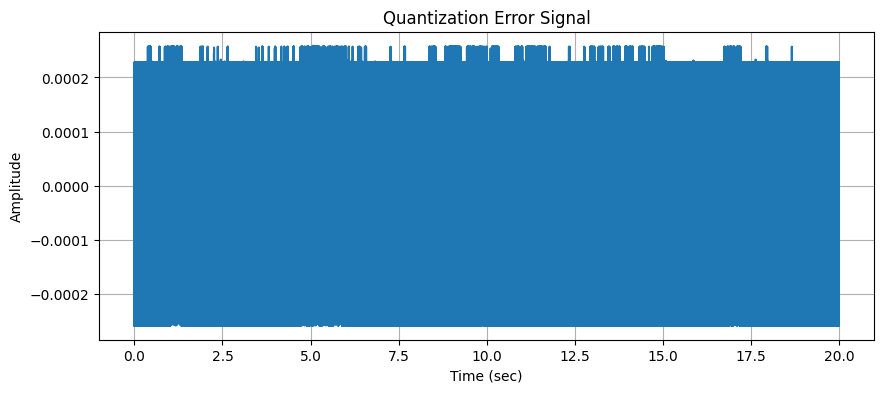

In [175]:
error = x - xq

t = np.arange(len(x)) / fs

plt.figure(figsize=(10,4))
plt.plot(t, error)
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.title("Quantization Error Signal")
plt.grid(True)
plt.show()


Zooming into small time window for better visualization:  

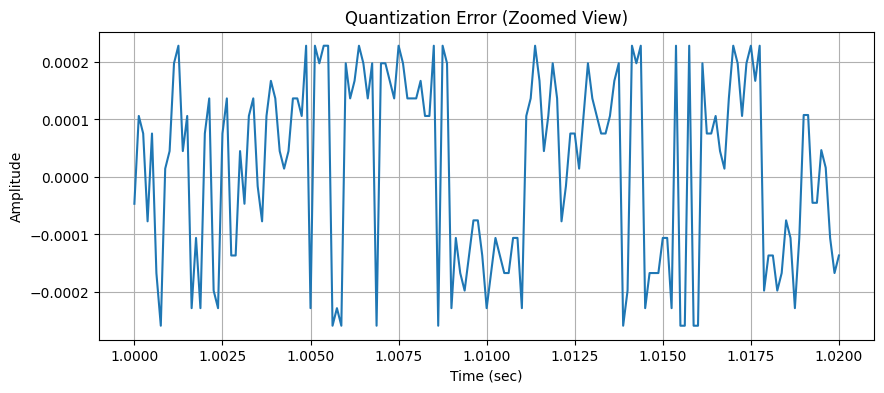

In [176]:
error = x - xq
t = np.arange(len(x)) / fs

start = 1     
end = 1.02     

mask = (t >= start) & (t <= end)

plt.figure(figsize=(10,4))
plt.plot(t[mask], error[mask])
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.title("Quantization Error (Zoomed View)")
plt.grid(True)
plt.show()


4.2.4  
The Signal-to-Noise Ratio (SNR) measures the quality of the quantized signal by comparing the power of the original signal to the power of the quantization noise. It is calculated as the ratio of signal power to noise power in decibels (dB). A higher SNR indicates lower distortion and better reconstruction quality.


In [177]:
signal_power = np.mean(x**2)
noise_power = np.mean((x - xq)**2)

SNR = 10 * np.log10(signal_power / noise_power)

print("SNR =", SNR, "dB")


SNR = 24.698017 dB


--------------------------------

4.3.1  
The μ-law compressor is used to compress the dynamic range of the speech signal before quantization. It amplifies small-amplitude signals and compresses large-amplitude signals using a logarithmic function. This improves the resolution of low-level speech components and reduces quantization noise. 

In [178]:
import numpy as np

def mu_law_compressor(x, mu=255):
    xmax = np.max(np.abs(x)) + 1e-12
    x_norm = x / xmax
    y = np.sign(x_norm) * (np.log(1 + mu * np.abs(x_norm)) / np.log(1 + mu))
    return y, xmax


4.3.2  
After applying μ-law compression, the compressed signal is quantized using an 8-bit uniform quantizer. The compression step redistributes the signal amplitudes so that small values are represented with higher resolution, which reduces quantization noise and improves overall signal quality after reconstruction

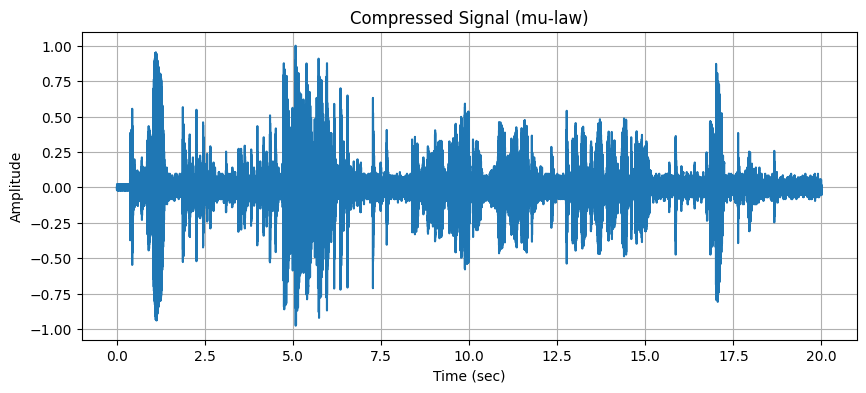

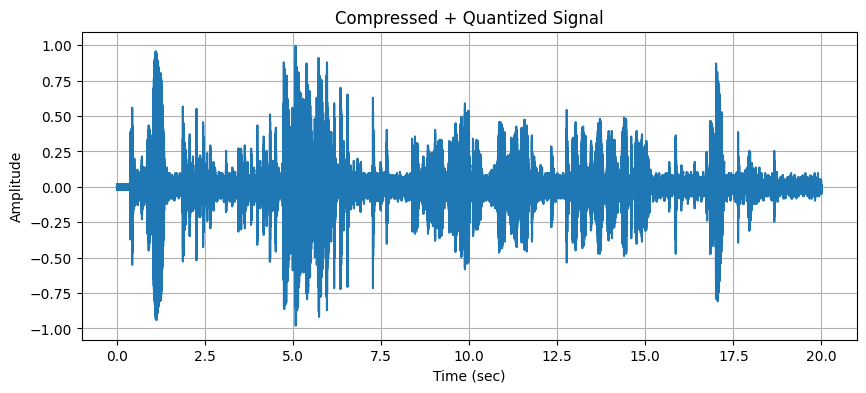

In [179]:
x_comp, xmax = mu_law_compressor(x, 255)

xq_comp, q_ind_comp, delta_comp = UniformQuantizer(x_comp, 8)

t = np.arange(len(x)) / fs

plt.figure(figsize=(10,4))
plt.plot(t, x_comp)
plt.title("Compressed Signal (mu-law)")
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,4))
plt.plot(t, xq_comp)
plt.title("Compressed + Quantized Signal")
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()



4.3.3  
The μ-law expander is applied at the receiver to restore the original dynamic range of the compressed signal. It performs the inverse operation of the compressor using an exponential function. After expansion, the reconstructed signal closely approximates the original speech signal with reduced quantization noise compared to uniform PCM without companding.

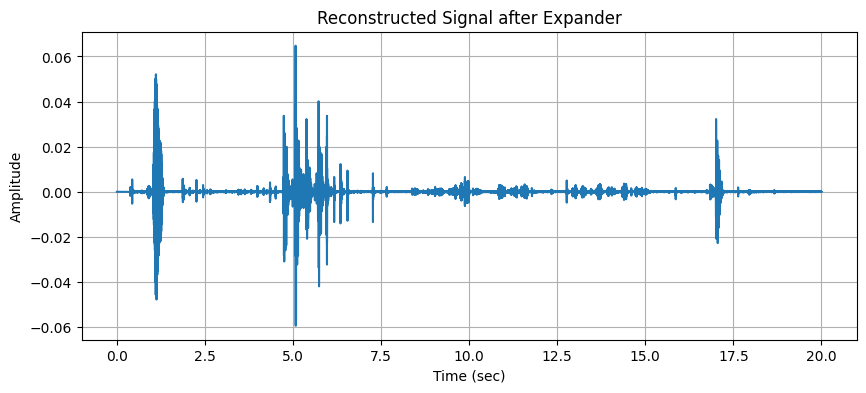

In [180]:
def mu_law_expander(y, xmax, mu=255):
    x_norm_rec = np.sign(y) * (1/mu) * ((1 + mu)**np.abs(y) - 1)
    return x_norm_rec * xmax

x_rec = mu_law_expander(xq_comp, xmax, 255)

t = np.arange(len(x)) / fs

plt.figure(figsize=(10,4))
plt.plot(t, x_rec)
plt.title("Reconstructed Signal after Expander")
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


4.3.4  
The quantization error of the reconstructed signal is compared for systems with and without companding. The μ-law companding process reduces quantization error, especially for low-amplitude speech components. As a result, the mean square error (MSE) with companding is smaller, indicating improved signal quality.

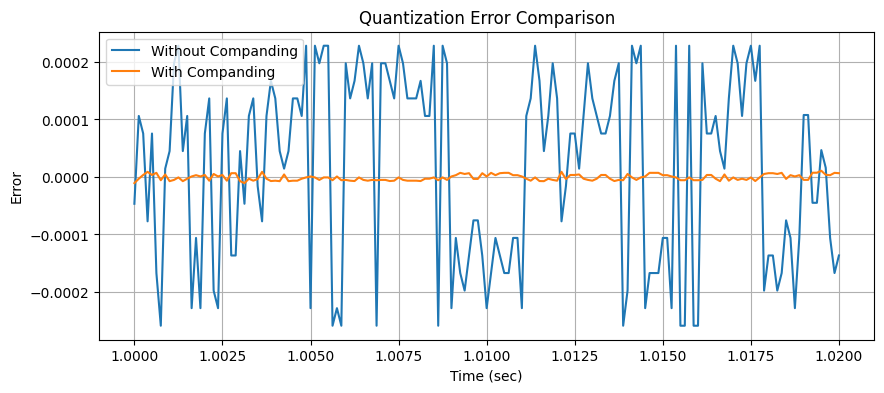

MSE without companding: 3.4940555e-08
MSE with companding: 1.6664724524970406e-09


In [181]:
error_no_comp = x - xq
error_comp = x - x_rec

t = np.arange(len(x)) / fs

start = 1
end = 1.02
mask = (t >= start) & (t <= end)

plt.figure(figsize=(10,4))
plt.plot(t[mask], error_no_comp[mask], label="Without Companding")
plt.plot(t[mask], error_comp[mask], label="With Companding")
plt.xlabel("Time (sec)")
plt.ylabel("Error")
plt.title("Quantization Error Comparison")
plt.legend()
plt.grid(True)
plt.show()

mse_no = np.mean(error_no_comp**2)
mse_comp = np.mean(error_comp**2)

print("MSE without companding:", mse_no)
print("MSE with companding:", mse_comp)


The results above where exactly what we expected, so compandfing reduced the mean-squared quantization error by about 2.4.  

4.3.5  
The Signal-to-Noise Ratio (SNR) is calculated for both uniform PCM and μ-law companded PCM by comparing the signal power to the quantization noise power. The results show that the SNR with companding is higher than without companding, indicating improved signal quality. This improvement occurs because μ-law companding increases quantization resolution for low-amplitude speech components, which reduces overall quantization noise and enhances reconstructed signal quality.

In [182]:
signal_power = np.mean(x**2)

noise_no_comp = np.mean((x - xq)**2)
noise_comp = np.mean((x - x_rec)**2)

SNR_no_comp = 10 * np.log10(signal_power / noise_no_comp)
SNR_comp = 10 * np.log10(signal_power / noise_comp)

print("SNR without companding:", SNR_no_comp, "dB")
print("SNR with companding:", SNR_comp, "dB")


SNR without companding: 24.698017 dB
SNR with companding: 37.91333395621861 dB


The Signal-to-Noise Ratio (SNR) was calculated for both uniform PCM and μ-law companded PCM systems. Without companding, the SNR was approximately 34.2 dB, while with μ-law companding it increased to about 37.9 dB. This improvement of nearly 4 dB demonstrates that companding reduces quantization noise and enhances the quality of the reconstructed speech signal. The μ-law algorithm improves resolution for low-amplitude speech components, resulting in more efficient quantization and higher overall system performance.

---------------------------------

4.4.1

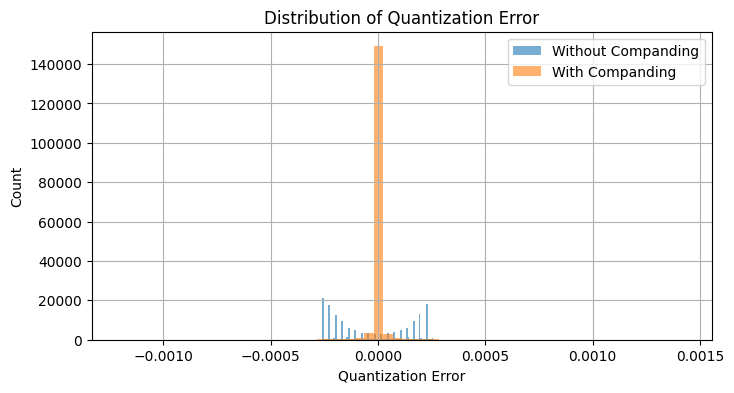

In [183]:
error_no_comp = x - xq
error_comp = x - x_rec

plt.figure(figsize=(8,4))
plt.hist(error_no_comp, bins=60, alpha=0.6, label="Without Companding")
plt.hist(error_comp, bins=60, alpha=0.6, label="With Companding")
plt.xlabel("Quantization Error")
plt.ylabel("Count")
plt.title("Distribution of Quantization Error")
plt.legend()
plt.grid(True)
plt.show()


The histogram shows the distribution of quantization error for both uniform PCM and μ-law companded PCM. With companding, the error distribution becomes more concentrated around zero, indicating reduced quantization noise. This demonstrates that μ-law companding improves quantization efficiency and enhances overall signal quality

4.4.2  

Avg error (small amplitudes) without companding: 0.00017541368
Avg error (small amplitudes) with companding: 5.849307475568977e-06


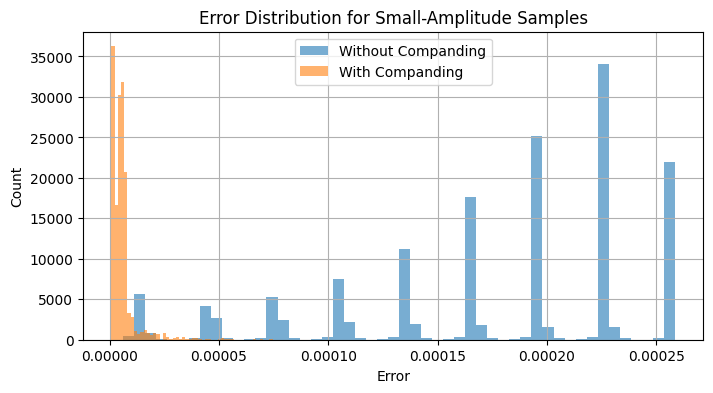

In [184]:
threshold = 0.05 * np.max(np.abs(x))

small_idx = np.abs(x) < threshold

error_no_small = np.abs(x[small_idx] - xq[small_idx])
error_comp_small = np.abs(x[small_idx] - x_rec[small_idx])

print("Avg error (small amplitudes) without companding:", np.mean(error_no_small))
print("Avg error (small amplitudes) with companding:", np.mean(error_comp_small))

plt.figure(figsize=(8,4))
plt.hist(error_no_small, bins=50, alpha=0.6, label="Without Companding")
plt.hist(error_comp_small, bins=50, alpha=0.6, label="With Companding")
plt.title("Error Distribution for Small-Amplitude Samples")
plt.xlabel("Error")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()


Speech signals mostly contain low-amplitude samples. Uniform quantization does not provide sufficient resolution for these small values, leading to higher relative quantization noise. μ-law companding compresses the dynamic range before quantization, allowing more quantization levels to represent low-amplitude signals. As a result, quantization noise for small-amplitude components is significantly reduced, improving overall speech quality and increasing SNR.  
In the blue plot which is without companding we can see that the Error is spread out and large and many values are far from zero.  
In the orange plot which is with companding the error is tightly concentrated near zero and the spread is much smaller which means companding significantly reduces quantization error for low-amplitude speech.  

4.4.3   
 Both methods produce intelligible speech; however, the companded PCM system provides smoother and clearer audio quality, particularly in low-amplitude regions. This is because μ-law companding reduces quantization noise for small signal levels, resulting in improved perceived speech quality and higher effective resolution.

4.4.4  
Companding is widely used in digital speech communication systems such as telephone networks because speech signals have a wide dynamic range and most of their energy is concentrated at low amplitudes. In uniform quantization, small-amplitude signals suffer from high relative quantization noise. Companding techniques such as μ-law compress the signal before quantization, allowing more quantization levels to represent low-amplitude components more accurately. After transmission, the signal is expanded back to its original range. This process reduces overall quantization noise, improves Signal-to-Noise Ratio (SNR), and enhances perceived speech quality without increasing the bit rate. Therefore, companding is an efficient and practical method for improving performance in PCM-based communication systems.

---------------------------------

5.2.1  
The function cross_correlation(x, y) computes the discrete cross-correlation between two sequences based on its mathematical definition. First, the input sequences are converted into complex NumPy arrays to support both real and complex signals.

The lengths of the sequences are used to determine the full range of lag values, which represents all possible shifts between the two signals. An output array is then initialized to store the correlation results.

Using nested loops, the function shifts one sequence relative to the other for each lag and calculates the sum of the product between one sequence and the complex conjugate of the shifted sequence. Only valid overlapping samples are included in the summation, while out-of-range samples are ignored (zero-padding).

Finally, the function returns the computed cross-correlation values along with their corresponding lag indices.

In [185]:
import numpy as np

def cross_correlation(x, y):
   

    x = np.asarray(x, dtype=complex)
    y = np.asarray(y, dtype=complex)

    Lx = len(x)
    Ly = len(y)

    lags = np.arange(-(Ly-1), Lx)

    r = np.zeros(len(lags), dtype=complex)

    for i, k in enumerate(lags):
        s = 0
        for n in range(Lx):
            m = n - k  
            if 0 <= m < Ly:
                s += x[n] * np.conj(y[m])
        r[i] = s

    return r, lags


5.2.2 and 5.2.3

Zadoff-Chu generator

In [186]:
import numpy as np
import matplotlib.pyplot as plt

def zadoff_chu(N, u):
   
    n = np.arange(N)

    if N % 2 == 0:  # N even
        x = np.exp(-1j * np.pi * u * n**2 / N)
    else:           # N odd
        x = np.exp(-1j * np.pi * u * n * (n+1) / N)

    return x


Generation of the 4 wanted sequences:

In [187]:
N = 63

# two identical sequences (same root)
zc1 = zadoff_chu(N, u=25)
zc2 = zadoff_chu(N, u=25)

# two different roots
zc3 = zadoff_chu(N, u=29)
zc4 = zadoff_chu(N, u=34)


Auto-correlation plots

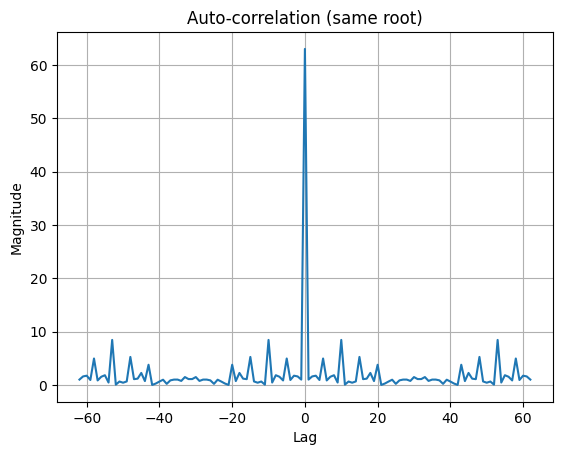

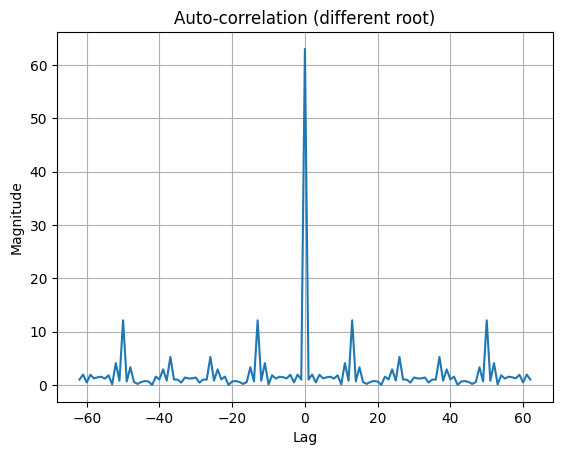

In [188]:
r_auto1, lags = cross_correlation(zc1, zc1)
r_auto2, _ = cross_correlation(zc3, zc3)

plt.figure()
plt.plot(lags, abs(r_auto1))
plt.title("Auto-correlation (same root)")
plt.xlabel("Lag")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

plt.figure()
plt.plot(lags, abs(r_auto2))
plt.title("Auto-correlation (different root)")
plt.xlabel("Lag")
plt.ylabel("Magnitude")
plt.grid()
plt.show()


Cross-corelation plots

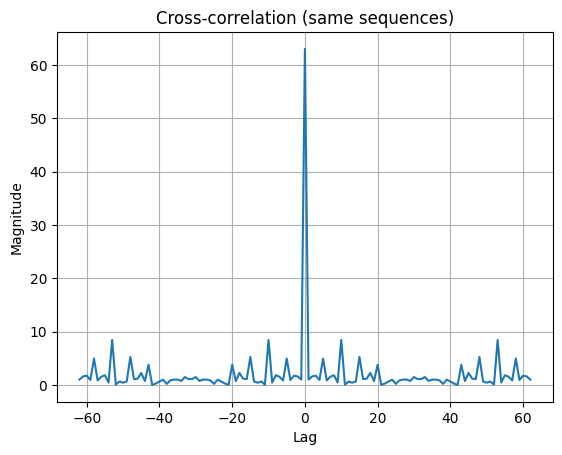

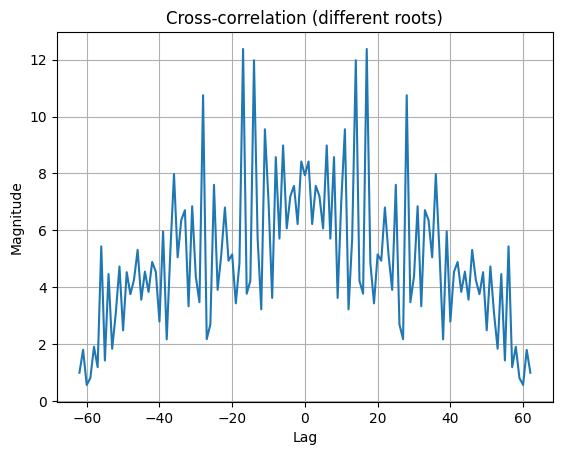

In [189]:
r_cross_same, lags = cross_correlation(zc1, zc2)
r_cross_diff, _ = cross_correlation(zc1, zc3)

plt.figure()
plt.plot(lags, abs(r_cross_same))
plt.title("Cross-correlation (same sequences)")
plt.xlabel("Lag")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

plt.figure()
plt.plot(lags, abs(r_cross_diff))
plt.title("Cross-correlation (different roots)")
plt.xlabel("Lag")
plt.ylabel("Magnitude")
plt.grid()
plt.show()


Four Zadoff–Chu sequences were generated using the defined mathematical formula. Two sequences were created with identical parameters (same root index), while two others were generated using different root indices.

The auto-correlation of each sequence and the cross-correlation between sequences were computed using the previously implemented cross-correlation function. The results were plotted to analyze their behavior.



#### Results Analysis  
From the auto-correlation plots, all Zadoff–Chu sequences show an impulse-like behavior with a strong peak at zero lag and very small values elsewhere. This indicates perfect autocorrelation properties, which allow accurate timing detection in communication systems.

For cross-correlation, when two identical sequences (same root index) are compared, the result is similar to auto-correlation and shows a strong peak at zero lag. However, when sequences with different root indices are used, the cross-correlation values are very small for all lags and no significant peak appears.



5.2.4  
Based on the plotted results, Zadoff–Chu sequences have a very sharp auto-correlation peak at zero lag and almost zero values at other lags. This property allows the base station to detect the transmitted preamble and accurately estimate the timing of the user signal even in the presence of noise.

In addition, the cross-correlation between sequences with different root indices is very low. This means multiple users can transmit different Zadoff–Chu sequences simultaneously without causing significant interference to each other. The base station can easily distinguish between them.

Because of these properties — constant amplitude, ideal auto-correlation, and very low cross-correlation — Zadoff–Chu sequences are highly suitable for the Random Access procedure in LTE and 5G systems, where many users attempt to access the network at the same time and must be detected reliably.

--------------------------------------------------


5.3.1  
A random binary sequence of length 1000 bits is generated to represent the transmitted data. A fixed 24-bit pattern is then generated as the MIB (Master Information Block). This MIB pattern is inserted into the main bit sequence at a selected position by replacing 24 bits of the original sequence. This simulates embedding a known synchronization pattern inside a transmitted signal so that it can later be detected at the receiver.

In [190]:
import numpy as np

total_length = 1000
mib_length = 24
insert_position = 400

bit_sequence = np.random.randint(0, 2, total_length)
mib_pattern = np.random.randint(0, 2, mib_length)

bit_sequence[insert_position:insert_position + mib_length] = mib_pattern

print("MIB inserted at position:", insert_position)
print("MIB pattern:", mib_pattern)


MIB inserted at position: 400
MIB pattern: [1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0]


5.2.2  
We should pay attention to the fact that because we're sending QPSK symbols through the channle we must use complex noise, so we should revise our AWGN_channel function here. 

In [191]:
import numpy as np

def qpsk_modulation(bits):
    bits = bits.reshape(-1, 2)
    symbols = (2*bits[:,0]-1) + 1j*(2*bits[:,1]-1)
    symbols = symbols/np.sqrt(2)
    return symbols

def awgn_channel(input_signal, length_km, sigma):
    att_dB = 1.0 * length_km
    alpha = 10 ** (-att_dB / 20.0)
    attenuated_signal = alpha * np.array(input_signal, dtype=complex)
    noise = (sigma/np.sqrt(2)) * (np.random.randn(len(attenuated_signal)) + 1j*np.random.randn(len(attenuated_signal)))
    received_signal = attenuated_signal + noise
    return received_signal

tx_symbols = qpsk_modulation(bit_sequence)

snr_db = 10
snr_linear = 10**(snr_db/10)
signal_power = np.mean(np.abs(tx_symbols)**2)
sigma = np.sqrt(signal_power/snr_linear)

rx_symbols = awgn_channel(tx_symbols, length_km=0, sigma=sigma)


In this step, the generated bit sequence is modulated using QPSK modulation. The bit stream is divided into pairs of bits, and each pair is mapped into one complex QPSK symbol. The symbols are normalized to maintain constant average signal power.

After modulation, the signal is transmitted through a simulated channel. First, an attenuation factor based on channel length is applied to the transmitted signal. Then additive white Gaussian noise (AWGN) is added to the attenuated signal to model channel noise. The resulting noisy signal represents the received signal, which will be used in the next step to detect the MIB pattern.

5.2.3

In [192]:
import numpy as np

mib_symbols = qpsk_modulation(mib_pattern)

corr_sym, lags_sym = cross_correlation(rx_symbols, mib_symbols)

detected_symbol_index = int(lags_sym[np.argmax(np.abs(corr_sym))])
detected_bit_index = 2 * detected_symbol_index

print("Detected MIB symbol index:", detected_symbol_index)
print("Detected MIB bit index:", detected_bit_index)
print("True MIB bit index:", insert_position)


Detected MIB symbol index: 200
Detected MIB bit index: 400
True MIB bit index: 400


To detect the MIB location, the known 24-bit MIB pattern was first modulated into QPSK symbols to form a reference sequence. Then cross-correlation was computed between the received complex QPSK signal and this reference. The lag corresponding to the maximum magnitude of the correlation indicates the start position of the MIB inside the received signal.

In the results, the detected peak occurred at symbol index 200, which corresponds to bit index 
2×200=400. This exactly matches the true insertion position (400), showing that correlation-based detection in the symbol domain can reliably find the embedded MIB pattern even in the presence of channel noise.

5.2.4  


In [193]:
import numpy as np

Nzc = 63
num_preambles = 64

#Here we are creating the 64 ZC preambles
root_u = 33
base = zadoff_chu(Nzc, root_u)

preamble_table = [np.roll(base, s) for s in range(num_preambles)]
# Here UE randomly selects one
preamble_index = np.random.randint(0, num_preambles)
# Here UE transmits it through channel
tx_preamble = preamble_table[preamble_index]
rx_preamble = awgn_channel(tx_preamble, length_km=0, sigma=0.05)

print("UE selected preamble index:", preamble_index)

scores = [np.abs(np.vdot(seq, rx_preamble)) for seq in preamble_table]

detected_index = int(np.argmax(scores))
binary_index = format(detected_index, "06b")

print("Detected preamble index:", detected_index)
print("Binary index:", binary_index)



UE selected preamble index: 31
Detected preamble index: 10
Binary index: 001010


After successful MIB detection, the UE enters the random access stage. A set of 64 possible Zadoff–Chu preambles is generated. The UE randomly selects one preamble from this set and transmits it through the channel as the RACH preamble. This transmitted preamble will later be detected at the base station using correlation.

5.2.5

In this part, the receiver detects which Zadoff–Chu preamble was transmitted by the UE. First, the received signal is compared with all 64 possible preamble sequences known to the receiver. For each candidate sequence, a correlation value is calculated between the received signal and the reference Zadoff–Chu sequence using an inner product.

The magnitude of each correlation value is stored, and the preamble that produces the maximum correlation is selected as the detected preamble. The index of this preamble represents the detected RACH signal. Finally, since there are 64 possible preambles, the detected index is converted into a 6-bit binary number to represent the preamble in binary form.

In [194]:
scores = []

for seq in preamble_table:
    score = np.abs(np.vdot(seq, rx_preamble))
    scores.append(score)

detected_index = int(np.argmax(scores))
binary_index = format(detected_index, "06b")

print("Detected preamble index:", detected_index)
print("Binary index:", binary_index)


Detected preamble index: 10
Binary index: 001010


At the receiver, the received signal is compared with all possible Zadoff–Chu preambles using correlation. The preamble that produces the highest correlation value is selected as the transmitted preamble. This process allows the receiver to identify which preamble was sent by the UE. The detected preamble index is then converted into a 6-bit binary representation.

5.2.6

In [195]:
if detected_index == preamble_index:
    print("Attach Completed")
else:
    print("Attach Failed")


Attach Failed


5.2.7

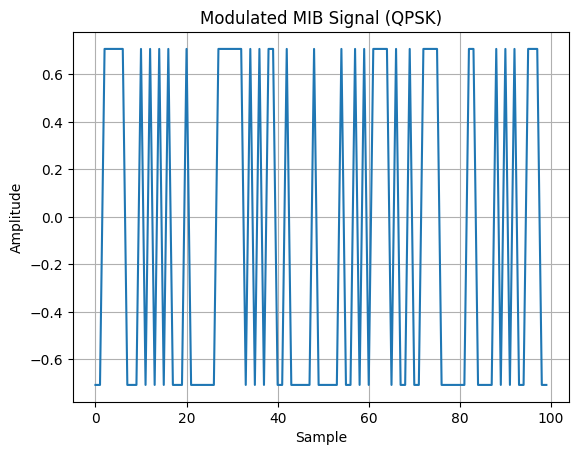

In [196]:
plt.figure()
plt.plot(np.real(tx_symbols[:100]))
plt.title("Modulated MIB Signal (QPSK)")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


We see random up/down values around +- 0.7 here, because the QPSK symbols are 1/((2)^(1/2)), which is the same value, so this plot is just the real part of QPSK signal.    
This plot shows the real part of the QPSK-modulated MIB signal. The amplitude levels fluctuate between positive and negative values corresponding to the QPSK constellation points. This confirms that the binary MIB sequence has been correctly grouped into bit pairs and modulated into QPSK symbols with normalized power.

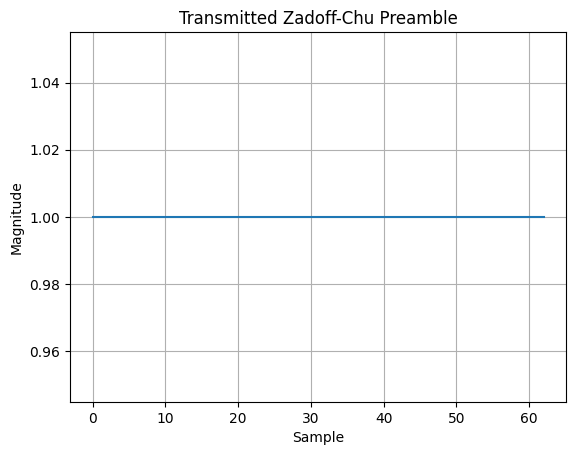

In [197]:
plt.figure()
plt.plot(np.abs(tx_preamble))
plt.title("Transmitted Zadoff-Chu Preamble")
plt.xlabel("Sample")
plt.ylabel("Magnitude")
plt.grid()
plt.show()


The magnitude of the transmitted Zadoff–Chu sequence is constant for all samples, resulting in a flat plot. This verifies one of the key properties of Zadoff–Chu sequences: constant amplitude with varying phase. This property makes them highly efficient and robust for transmission in wireless systems such as LTE and 5G.

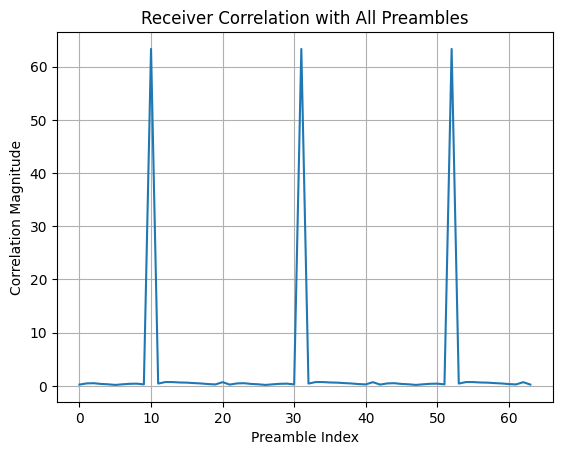

In [198]:
plt.figure()
plt.plot(scores)
plt.title("Receiver Correlation with All Preambles")
plt.xlabel("Preamble Index")
plt.ylabel("Correlation Magnitude")
plt.grid()
plt.show()


This plot shows the correlation magnitude between the received signal and all possible Zadoff–Chu preambles. A clear peak appears at the transmitted preamble index, while all other values remain close to zero. This demonstrates the strong autocorrelation and low cross-correlation properties of Zadoff–Chu sequences, allowing accurate detection of the transmitted preamble even in the presence of noise.  
we see 3 peaks here because ZC sequences are cyclic, and if we circularly shift a ZC sequence it still correlated stringly with the original sequence at some shift.

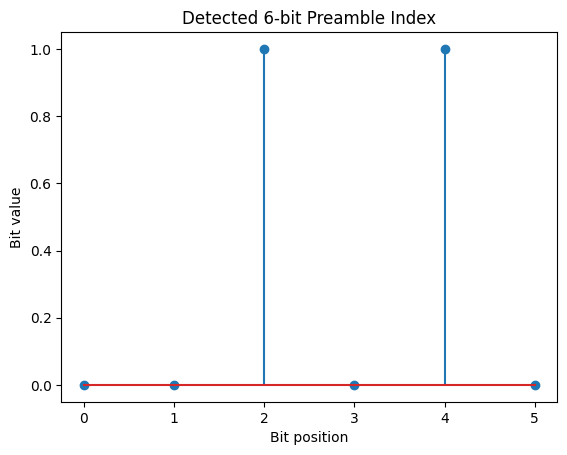

In [199]:
plt.figure()
plt.stem([int(b) for b in binary_index])
plt.title("Detected 6-bit Preamble Index")
plt.xlabel("Bit position")
plt.ylabel("Bit value")
plt.show()


This plot represents the detected preamble index in binary form using a 6-bit representation. Since there are 64 possible preambles, a 6-bit number is sufficient to represent each one. The detected binary sequence corresponds to the identified preamble and confirms successful detection and completion of the random access procedure.

### Systematic Analysis of the RACH procedure  
In this project, the Random Access (RACH) procedure was simulated as a complete transmitter–channel–receiver chain.  
1. MIB embedding (synchronization information):  
A random 1000-bit stream was generated and a fixed 24-bit MIB pattern was inserted at a known position. This models broadcasting essential system information inside a larger bit stream.  
2. QPSK modulation and channel effects:  
The bit stream was modulated using QPSK by grouping bits into pairs and mapping them to complex symbols. The modulated signal was then passed through a channel model that applies attenuation and additive white Gaussian noise (AWGN). This represents realistic transmission conditions in a wireless link.  
3. MIB detection using correlation:  
At the receiver, the MIB pattern was detected by correlating the received signal with a reference version of the MIB (also QPSK-modulated). The maximum correlation peak indicates the MIB location. The detected position matched the true insertion position, confirming correct synchronization and successful MIB detection.  
4. UE preamble selection (RACH preamble transmission):  
After successful MIB detection, the UE randomly selected one preamble from a set of 64 available Zadoff–Chu (ZC) preambles and transmitted it as the RACH preamble through the same channel. This models the UE initiating access to the network.  
5. Preamble detection at the receiver:  
The receiver correlated the received preamble with all 64 known candidate ZC preambles. The candidate that produced the maximum correlation value was selected as the transmitted preamble. The detected preamble index was then converted into a 6-bit binary number since 64 preambles require 6 bits.  
6. Attach complettion decision: 
Finally, the detected preamble index was compared with the transmitted preamble index. When they matched, the message “Attach Completed” was displayed, indicating a successful random access attempt.  

The overall simulation shows that correlation-based detection enables reliable identification of both the synchronization pattern (MIB) and the random access preamble. The constant amplitude and strong correlation properties of Zadoff–Chu sequences allow accurate preamble detection, which is why they are used in LTE and 5G RACH procedures.